#***사전작업***

In [9]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.5 MB/s 


In [99]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math
import sweetviz as sv
import missingno as msno
plt.style.use('seaborn')
sns.set(font_scale = 2.5)

%matplotlib inline

In [101]:
#데이터 셋 만들기 - 판다스의 read_csv를 이용한다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#***데이터 살펴보기***

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


                                             |          | [  0%]   00:00 -> (? left)


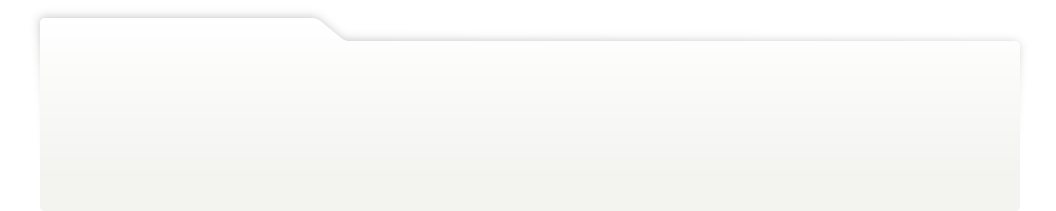
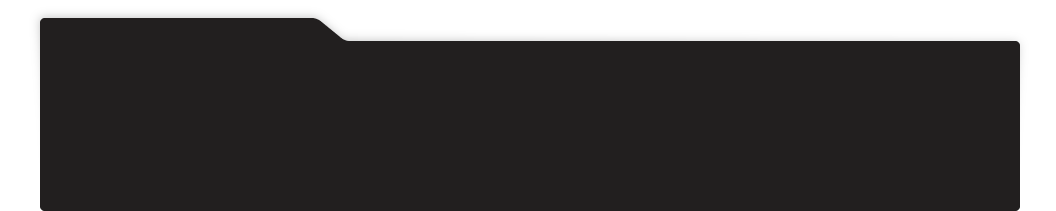
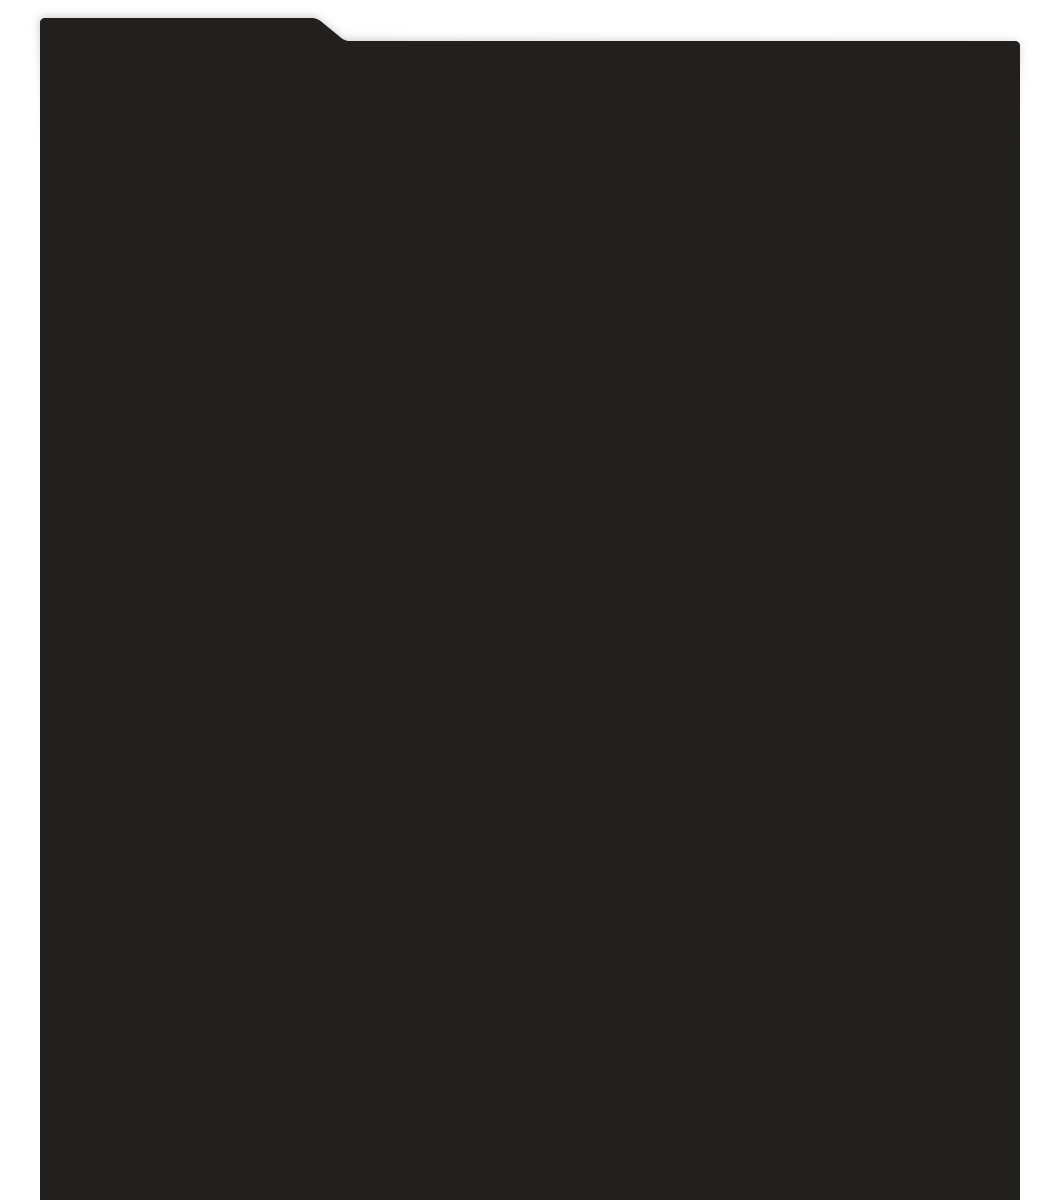
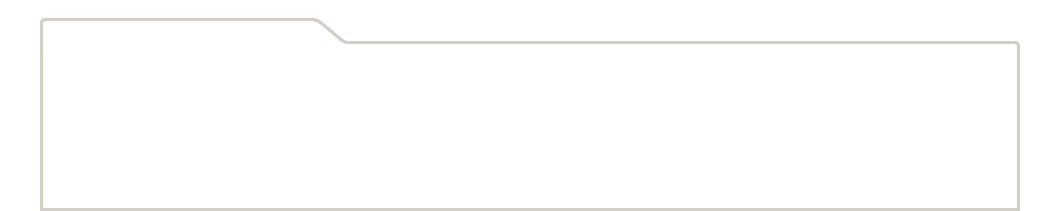
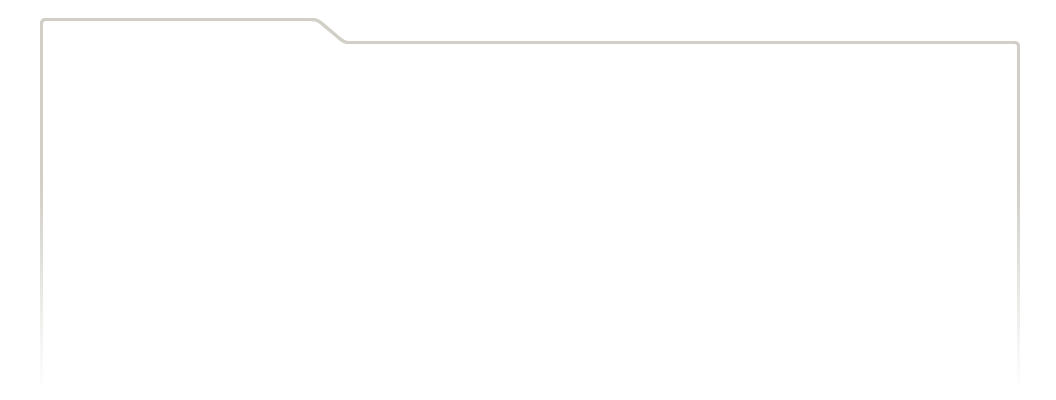
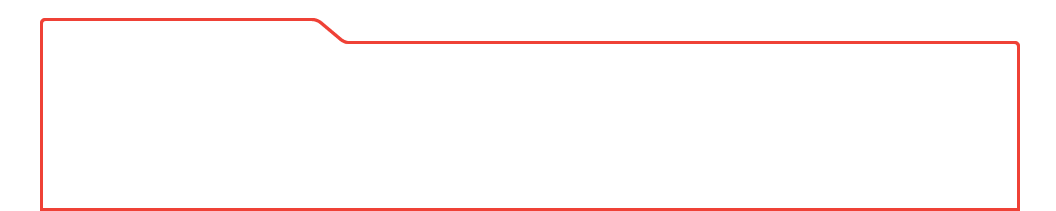
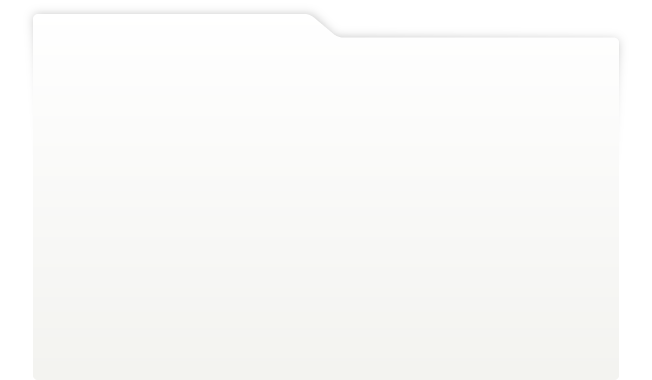
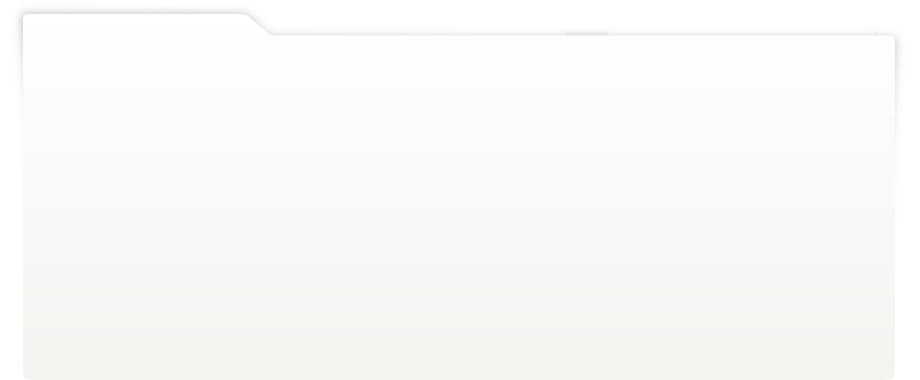
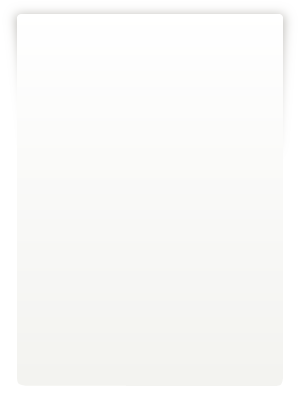
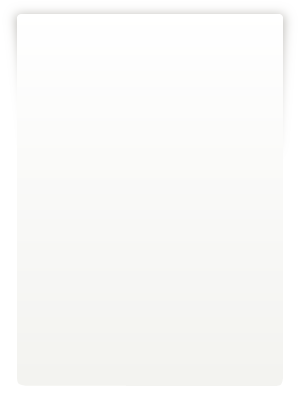
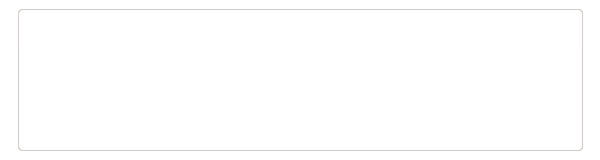
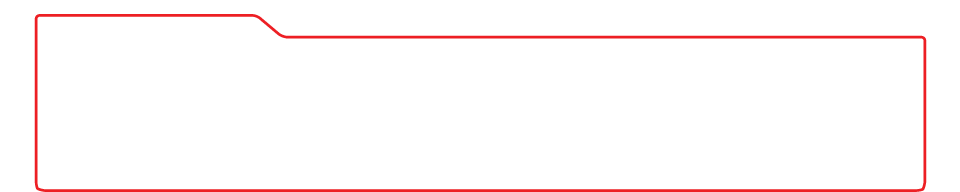
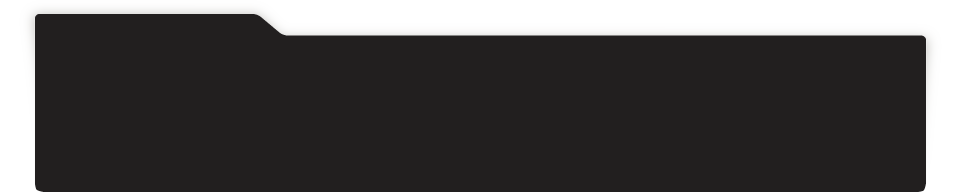
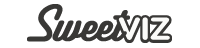
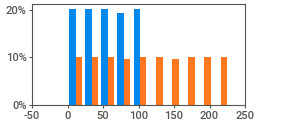
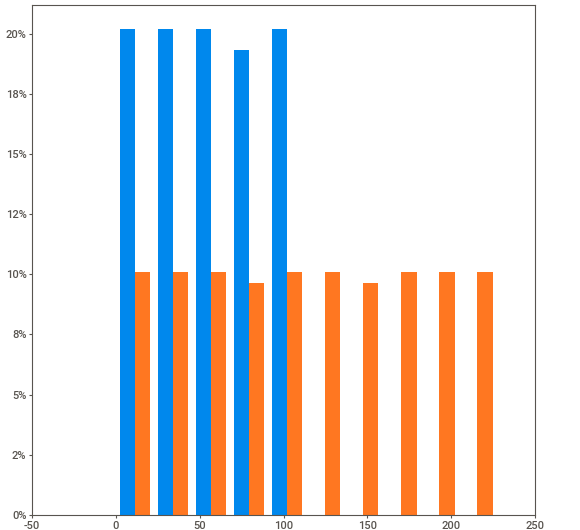
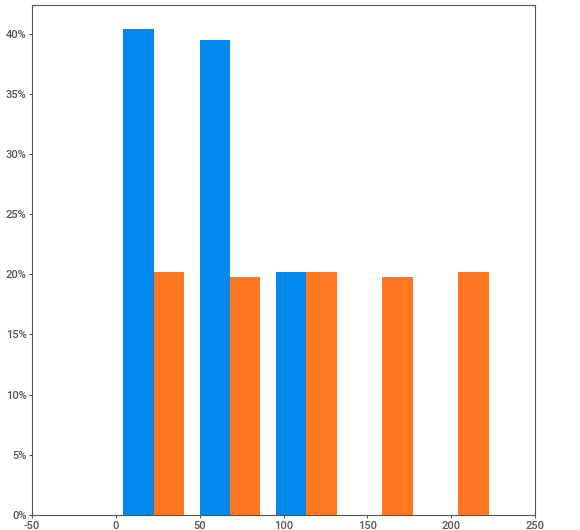
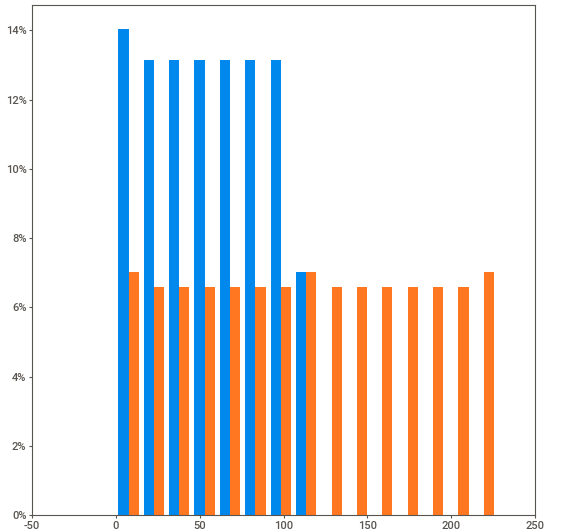
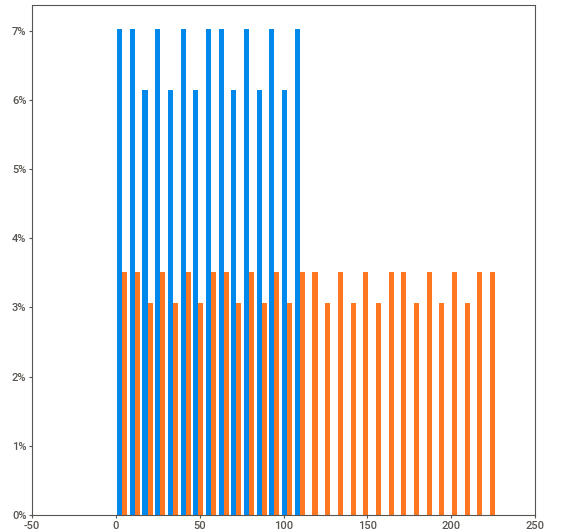
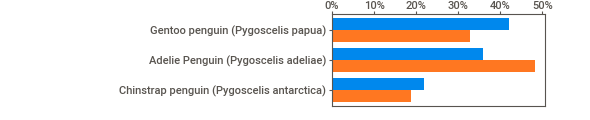
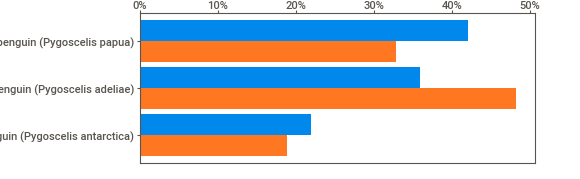
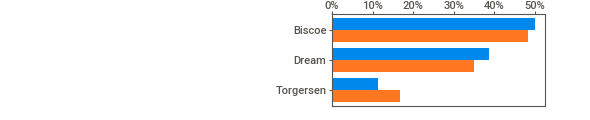
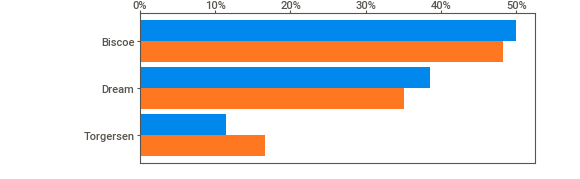
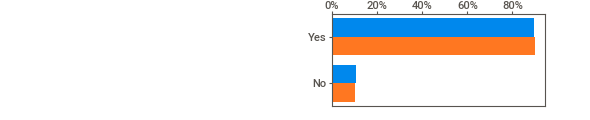
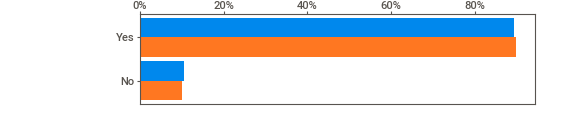
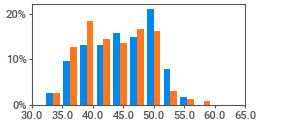
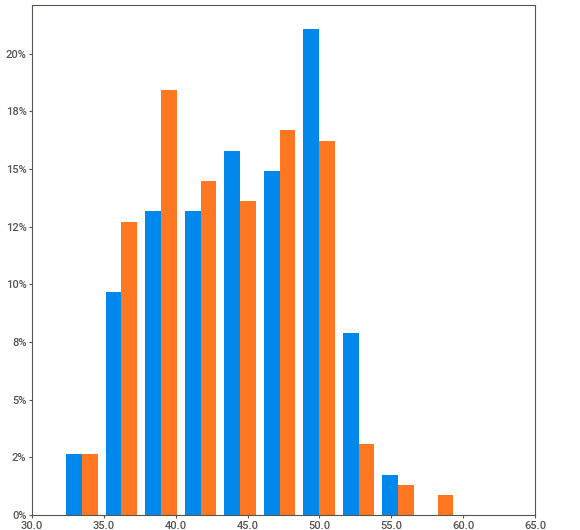
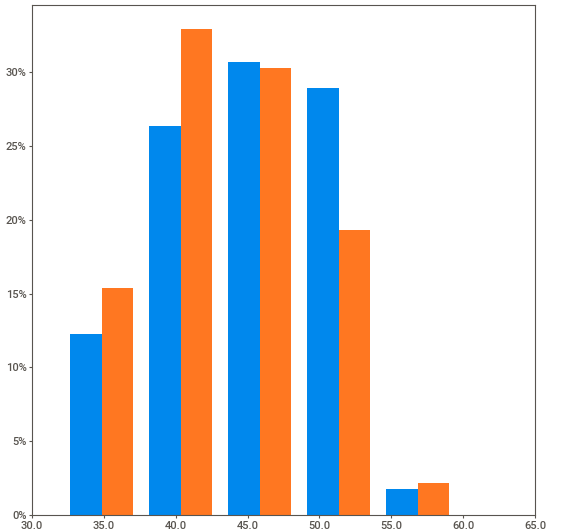
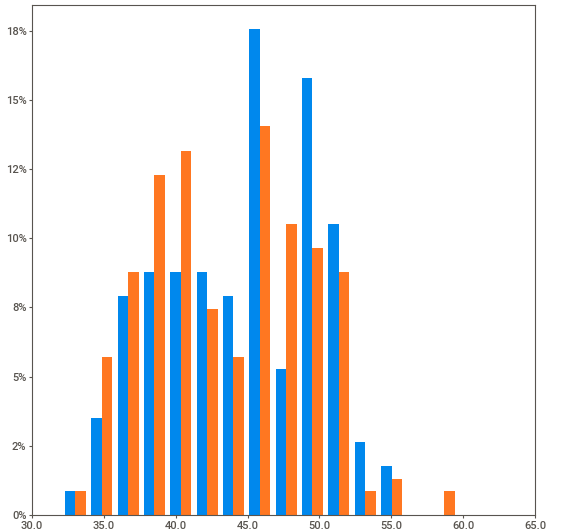
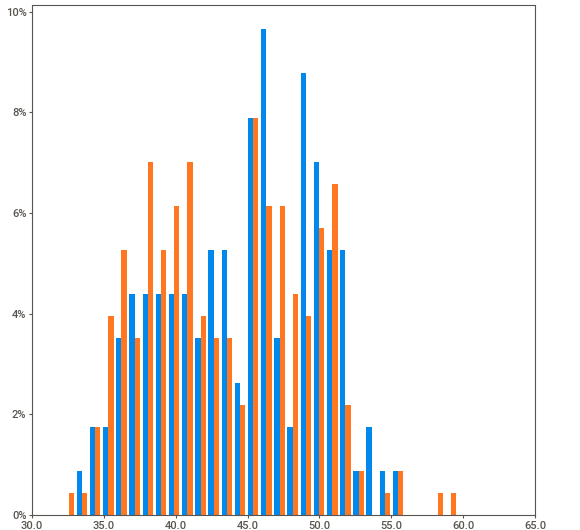
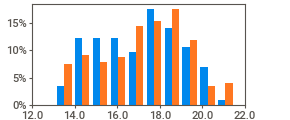
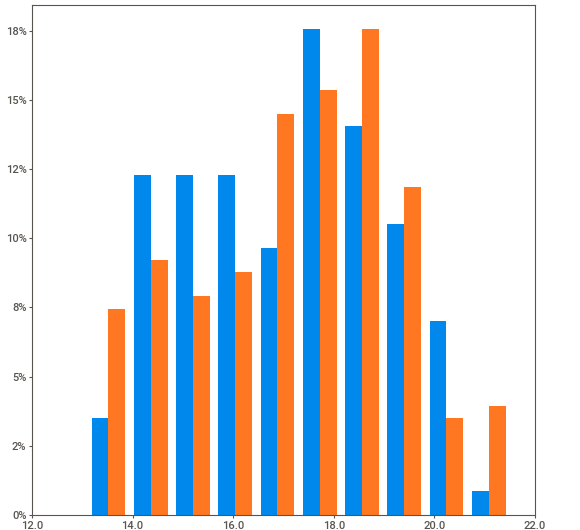
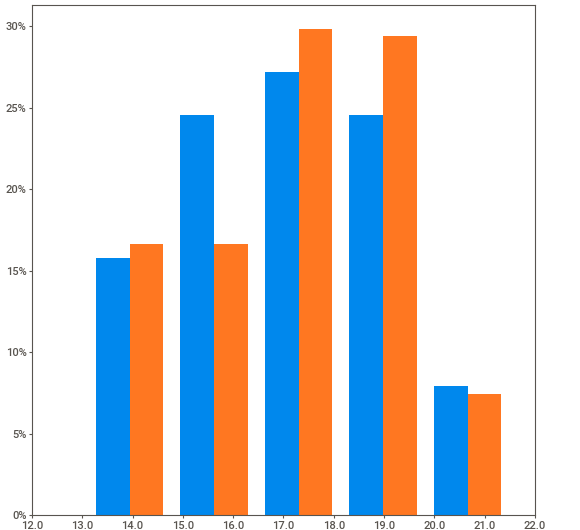
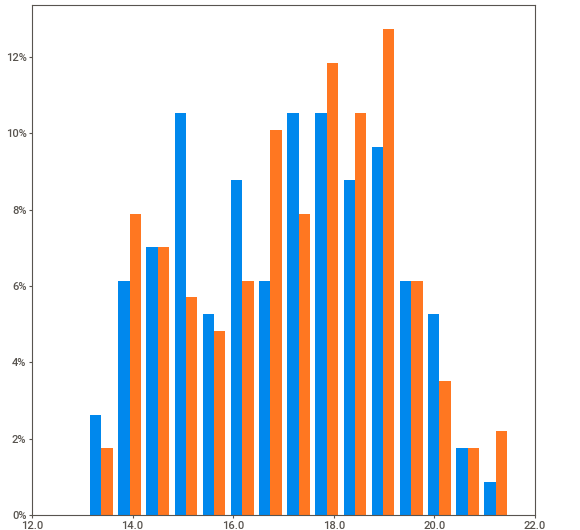
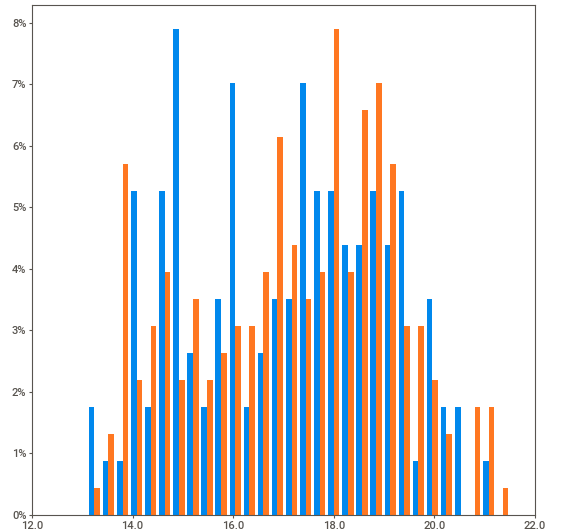
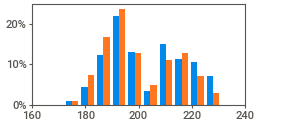
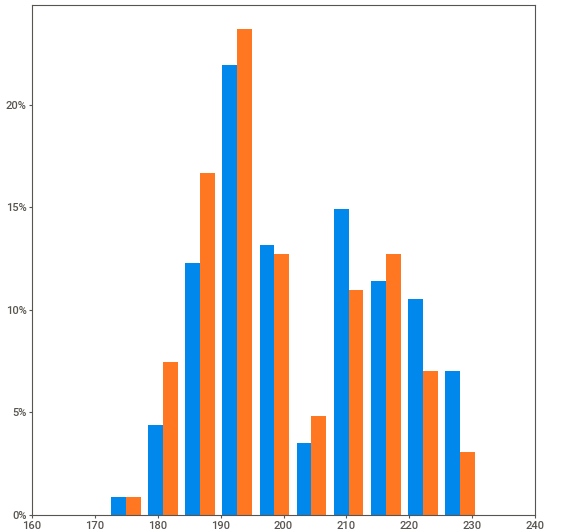
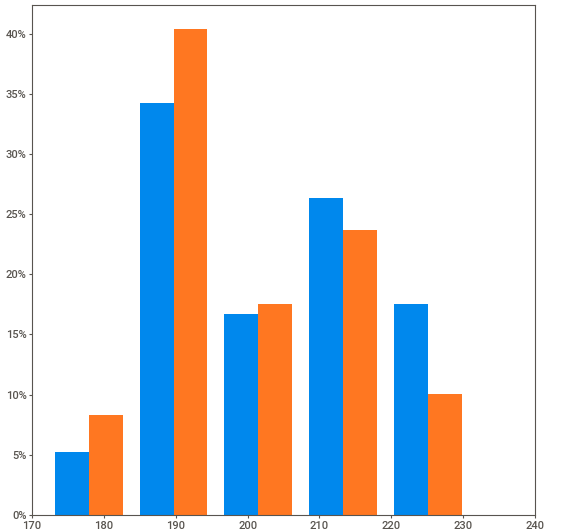
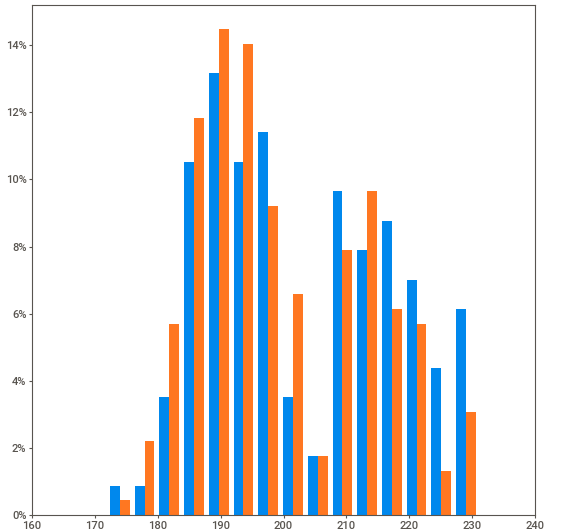
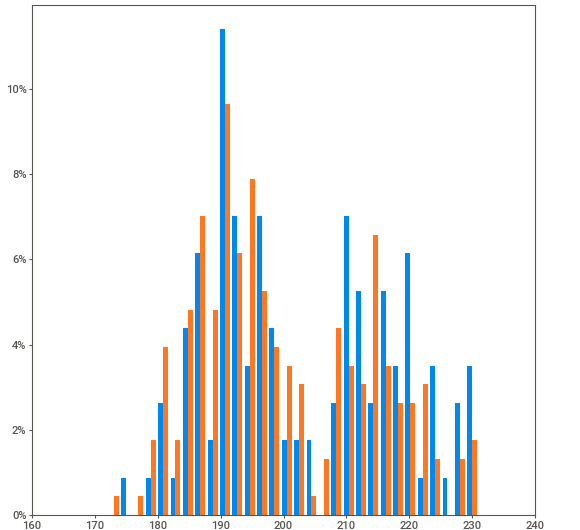
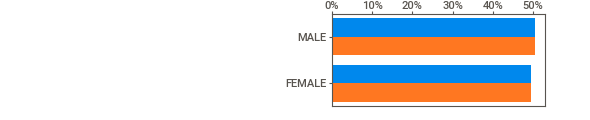
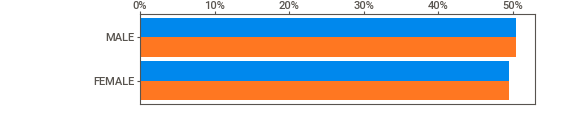
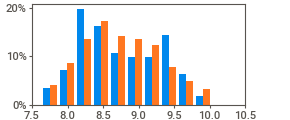
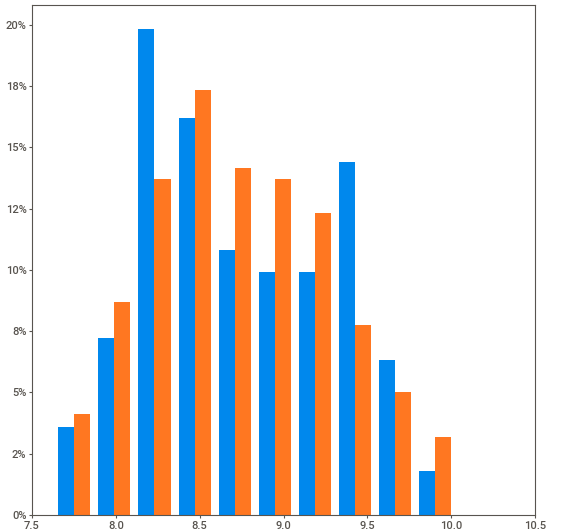
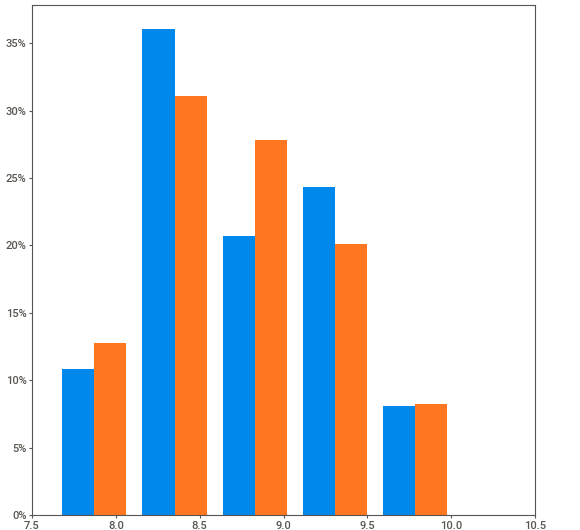
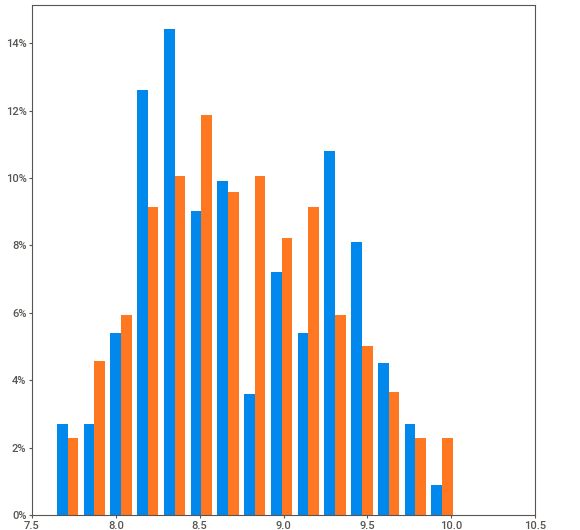
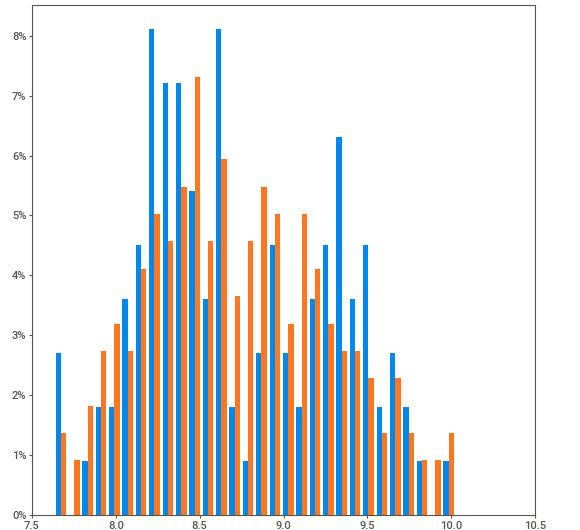
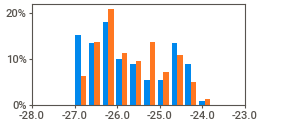
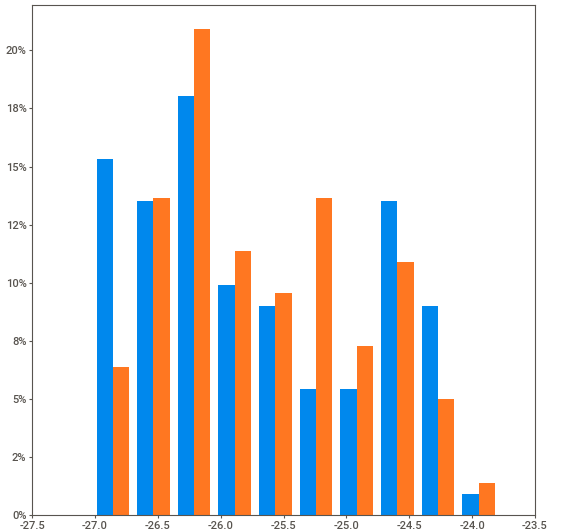
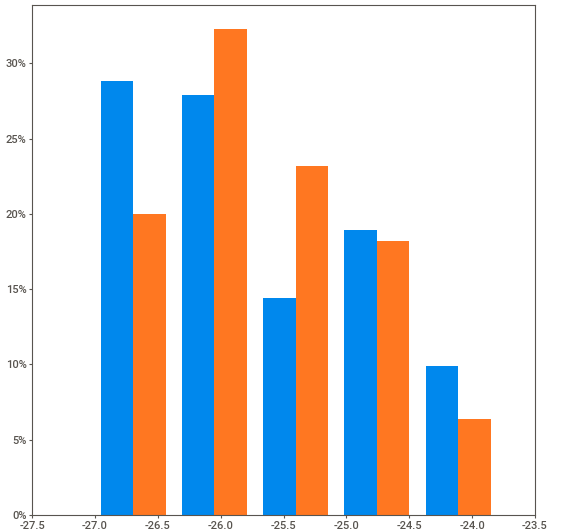
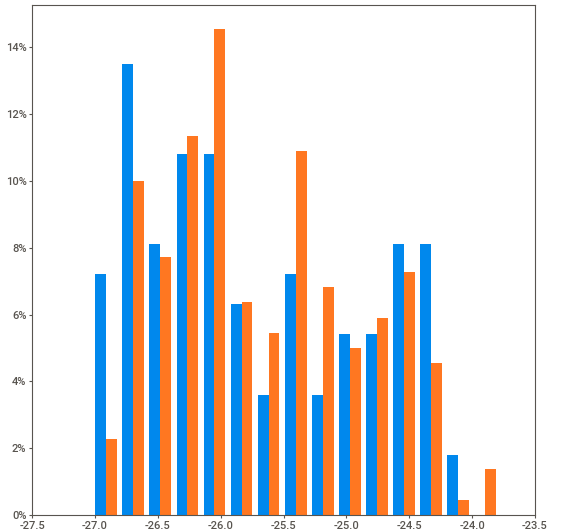
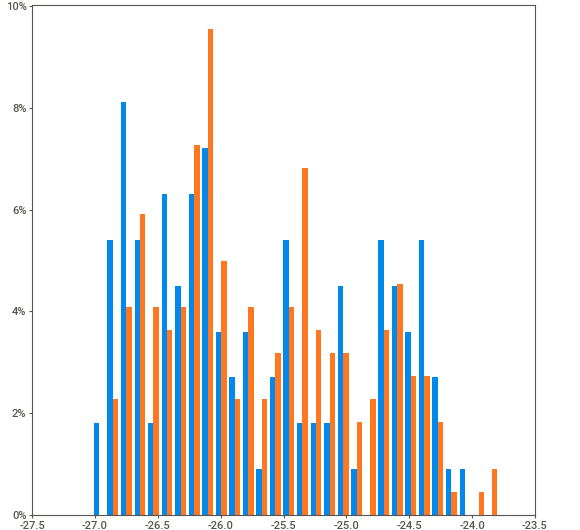
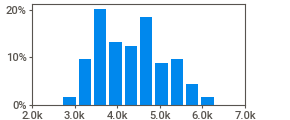
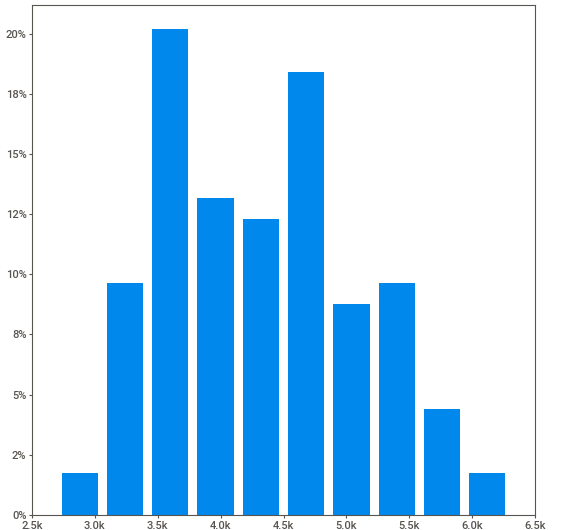
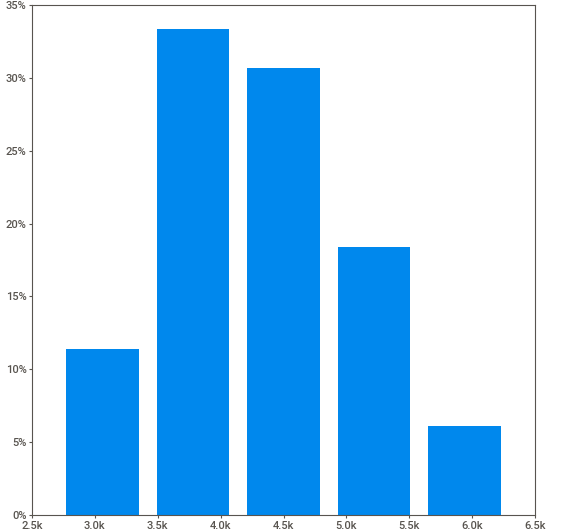
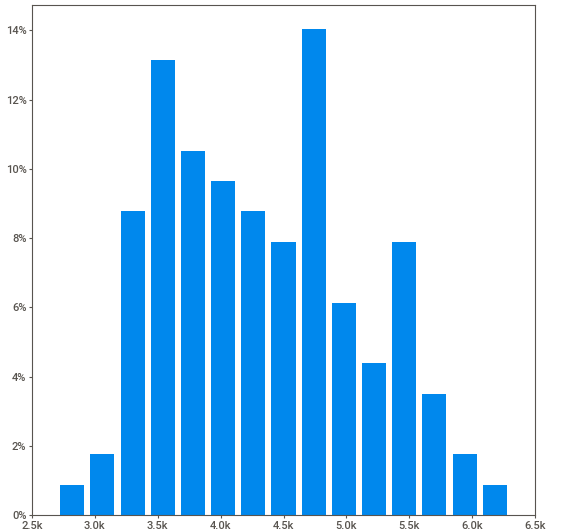
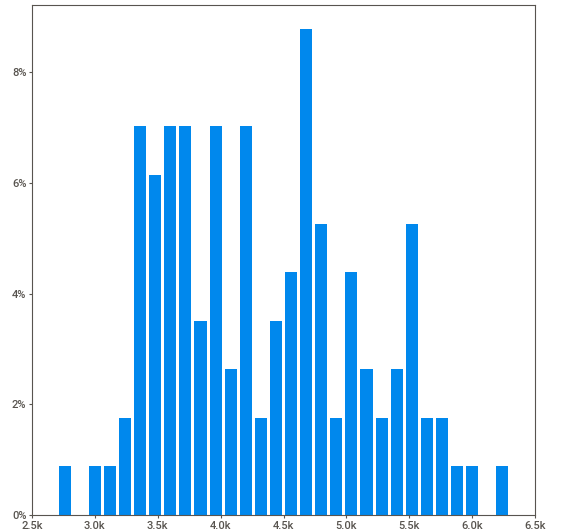
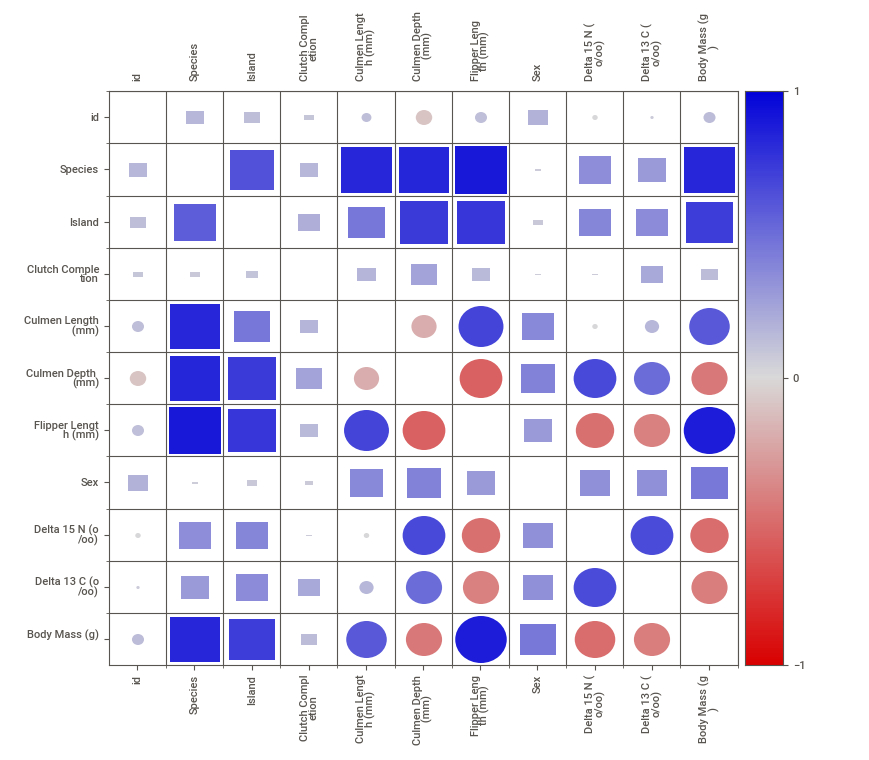
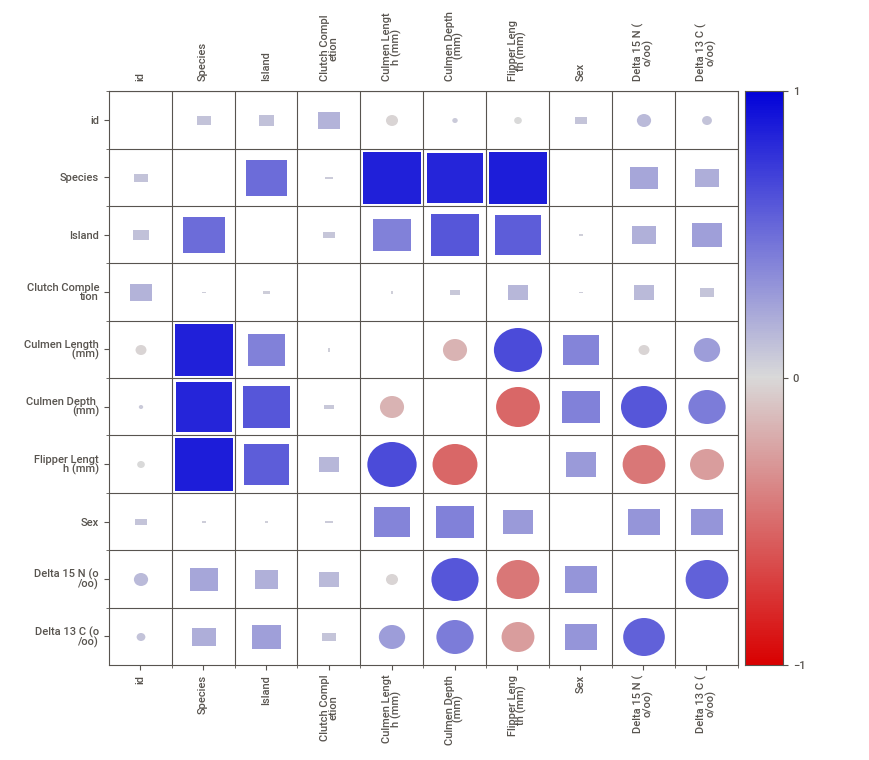

In [14]:
# Train & Test Dataset 비교
my_report_train_vs_test = sv.compare(train, test)
my_report_train_vs_test.show_notebook()

In [102]:
df = train.copy()
df = df.drop(['id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [103]:
for col in df.columns:
    msg = 'column: {:>20} \t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

column:              Species 	 Percent of NaN value: 0.00%
column:               Island 	 Percent of NaN value: 0.00%
column:    Clutch Completion 	 Percent of NaN value: 0.00%
column:   Culmen Length (mm) 	 Percent of NaN value: 0.00%
column:    Culmen Depth (mm) 	 Percent of NaN value: 0.00%
column:  Flipper Length (mm) 	 Percent of NaN value: 0.00%
column:                  Sex 	 Percent of NaN value: 2.63%
column:    Delta 15 N (o/oo) 	 Percent of NaN value: 2.63%
column:    Delta 13 C (o/oo) 	 Percent of NaN value: 2.63%
column:        Body Mass (g) 	 Percent of NaN value: 0.00%


In [121]:
#범주형과 수치형으로 분리
object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

#***결측값*** ***지우기*** 

In [139]:
columns_with_lowNA = ['Sex']
#fill missing values for each column (using its own most frequent value)
object_columns_df[columns_with_lowNA] = object_columns_df[columns_with_lowNA].fillna(object_columns_df.mode().iloc[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [140]:
for col in object_columns_df.columns:
    msg = 'column: {:>20} \t Percent of NaN value: {:.2f}%'.format(col, 100 * (object_columns_df[col].isnull().sum() / object_columns_df[col].shape[0]))
    print(msg)

column:              Species 	 Percent of NaN value: 0.00%
column:               Island 	 Percent of NaN value: 0.00%
column:    Clutch Completion 	 Percent of NaN value: 0.00%
column:                  Sex 	 Percent of NaN value: 0.00%


In [141]:
m1 = numerical_columns_df['Delta 15 N (o/oo)'].median()
m2 = numerical_columns_df['Delta 13 C (o/oo)'].median()
numerical_columns_df['Delta 15 N (o/oo)'] = numerical_columns_df['Delta 15 N (o/oo)'].fillna(m1)
numerical_columns_df['Delta 13 C (o/oo)'] = numerical_columns_df['Delta 13 C (o/oo)'].fillna(m2)

In [142]:
for col in numerical_columns_df.columns:
    msg = 'column: {:>20} \t Percent of NaN value: {:.2f}%'.format(col, 100 * (numerical_columns_df[col].isnull().sum() / numerical_columns_df[col].shape[0]))
    print(msg)

column:   Culmen Length (mm) 	 Percent of NaN value: 0.00%
column:    Culmen Depth (mm) 	 Percent of NaN value: 0.00%
column:  Flipper Length (mm) 	 Percent of NaN value: 0.00%
column:    Delta 15 N (o/oo) 	 Percent of NaN value: 0.00%
column:    Delta 13 C (o/oo) 	 Percent of NaN value: 0.00%
column:        Body Mass (g) 	 Percent of NaN value: 0.00%


#***이상치는 없는지 눈에 띄는 특징이 있는지 살펴보기***

                                             |          | [  0%]   00:00 -> (? left)


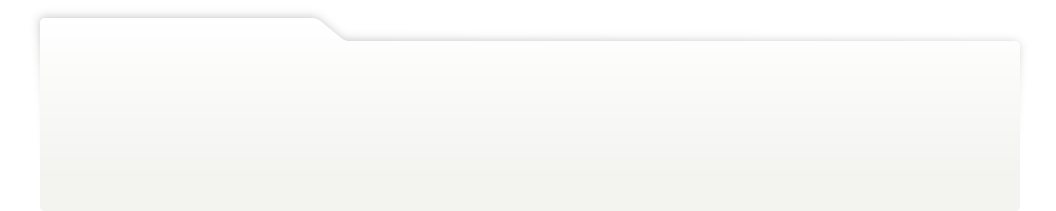
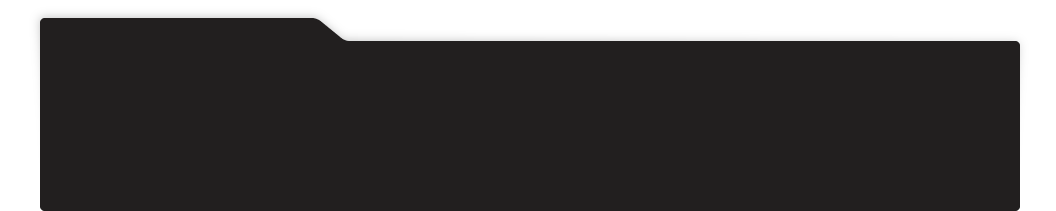
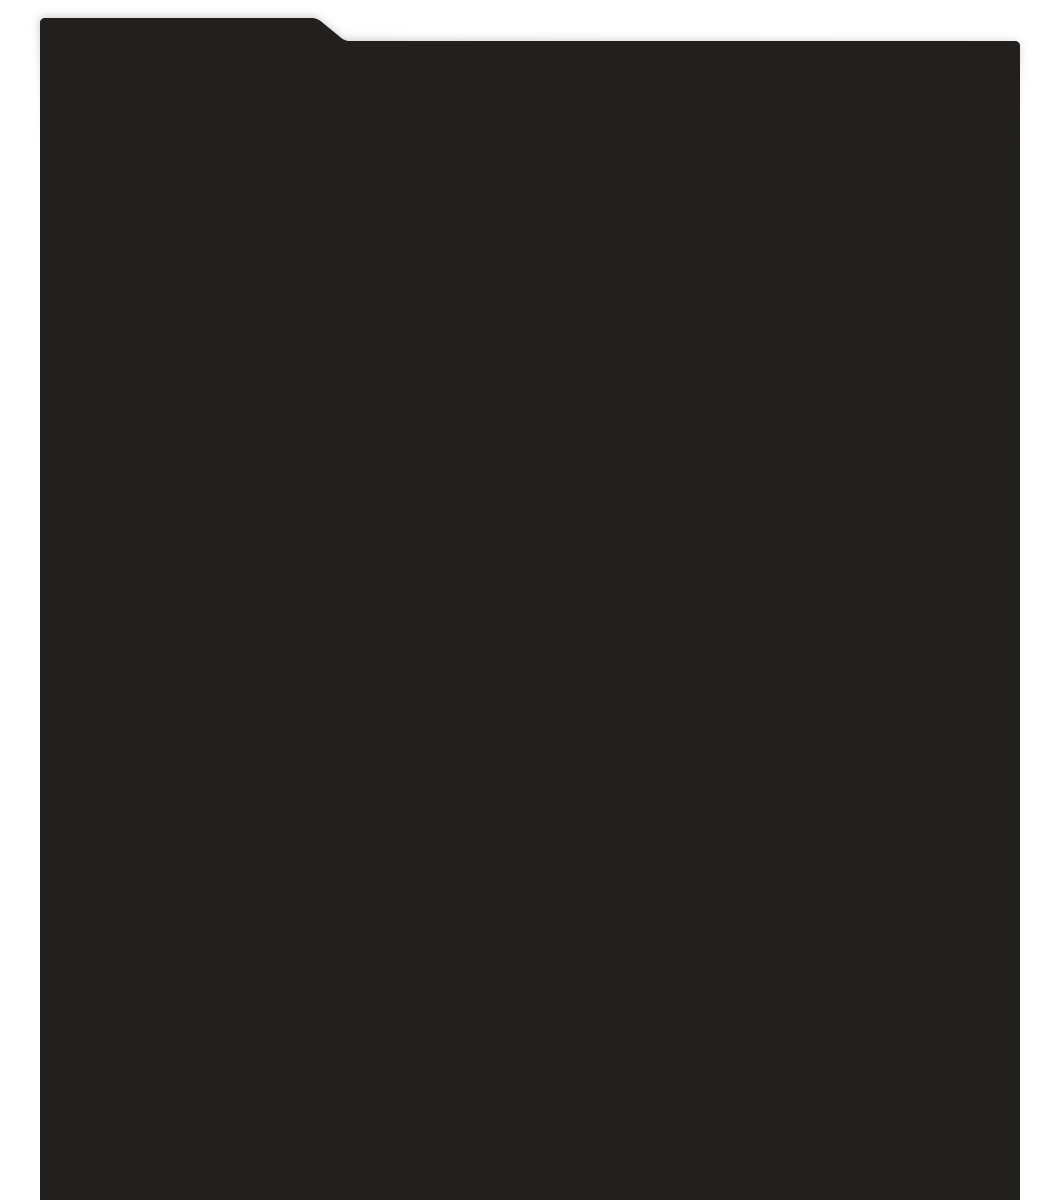
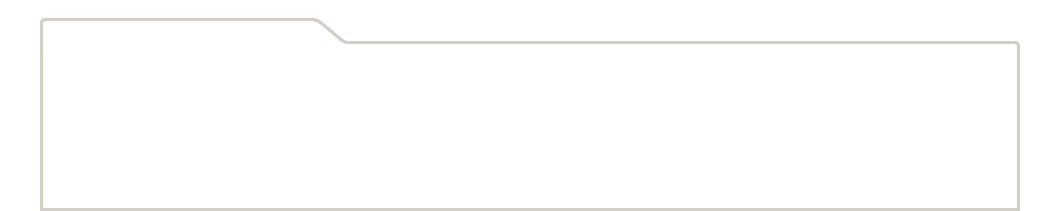
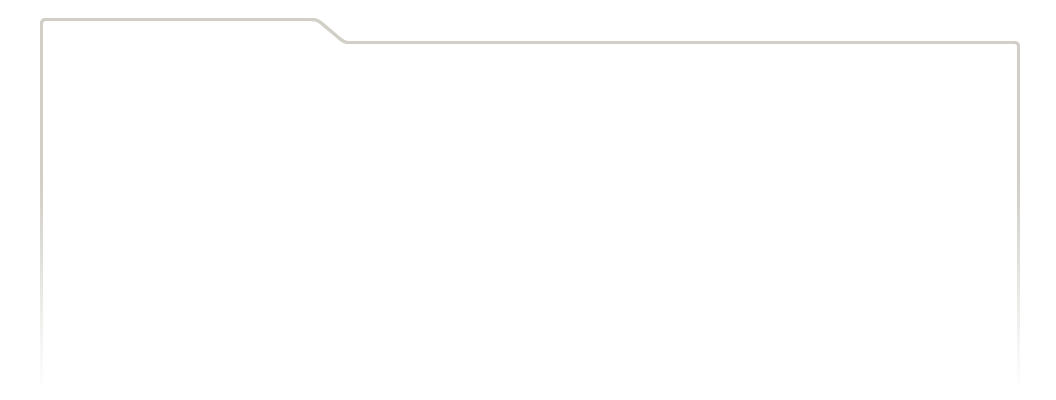
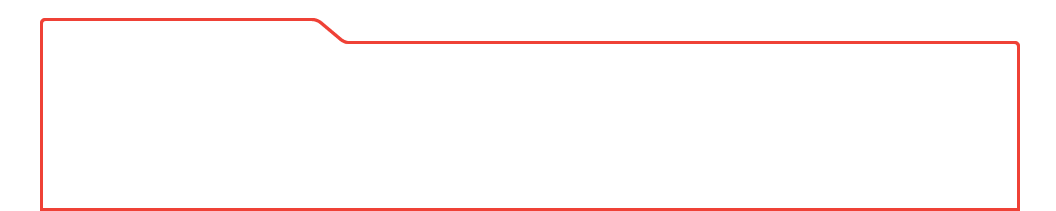
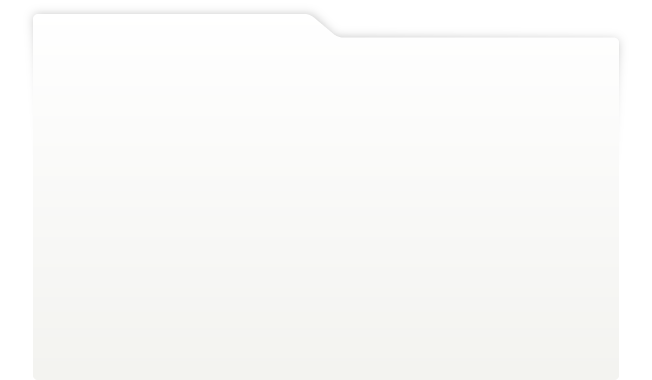
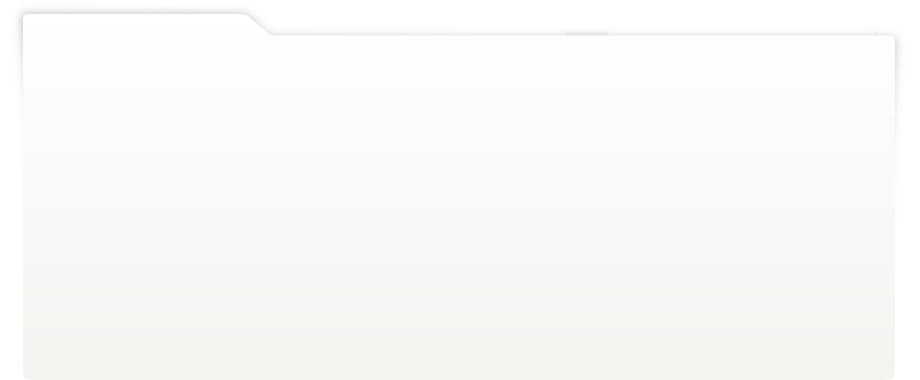
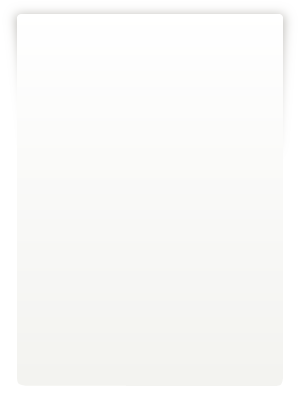
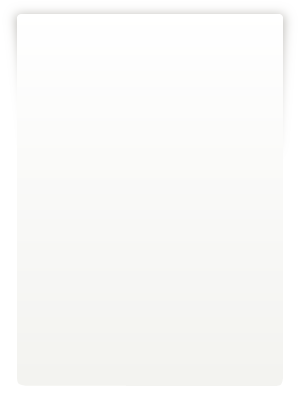
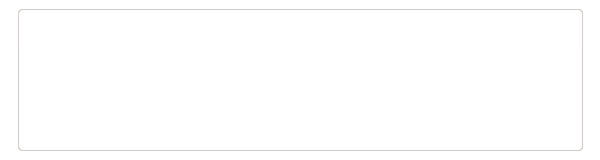
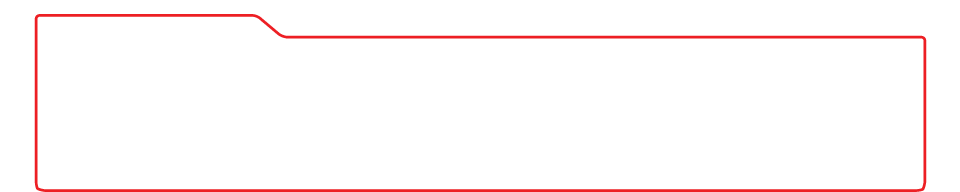
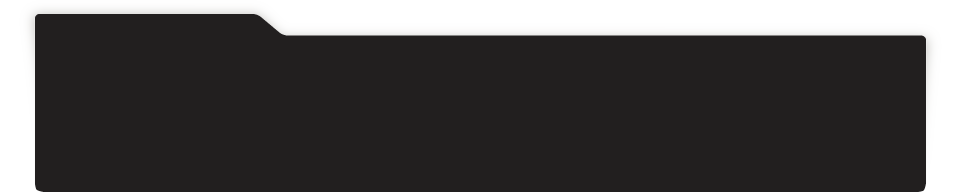
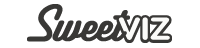
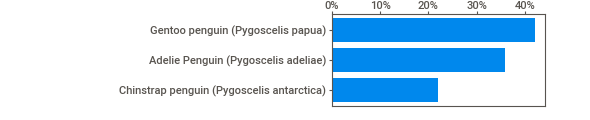
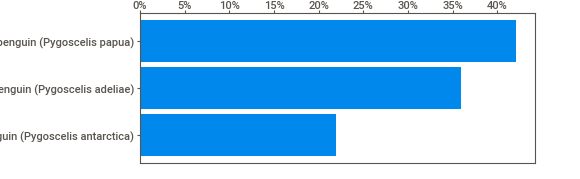
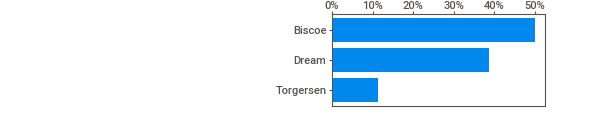
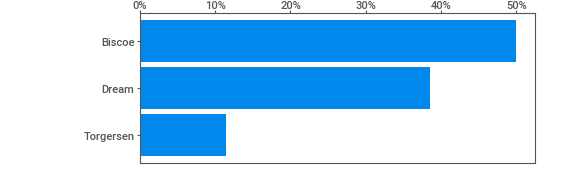
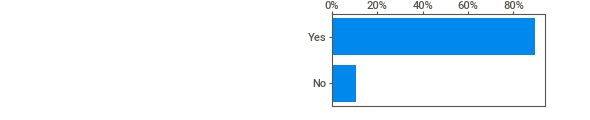
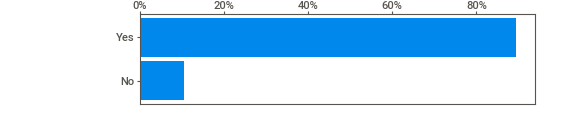
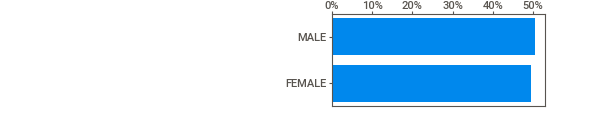
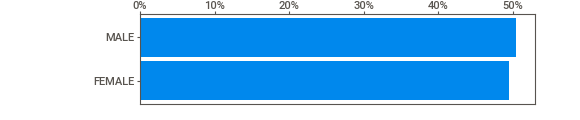
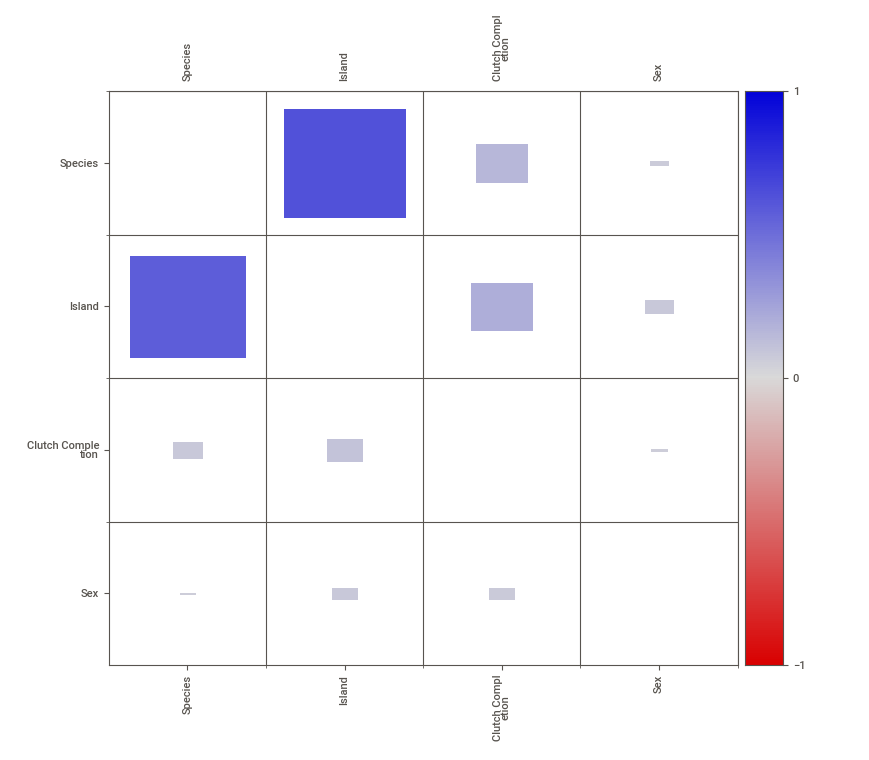
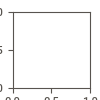

In [47]:
# Object Dataset 분석
my_report_object = sv.analyze(object_columns_df)
my_report_object.show_notebook()

In [109]:
object_columns_df = object_columns_df.drop(['Clutch Completion'],axis=1)

                                             |          | [  0%]   00:00 -> (? left)


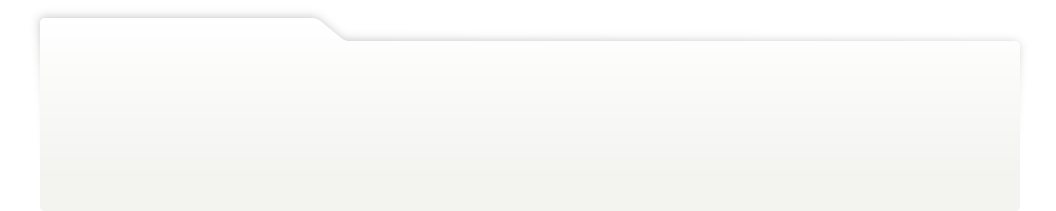
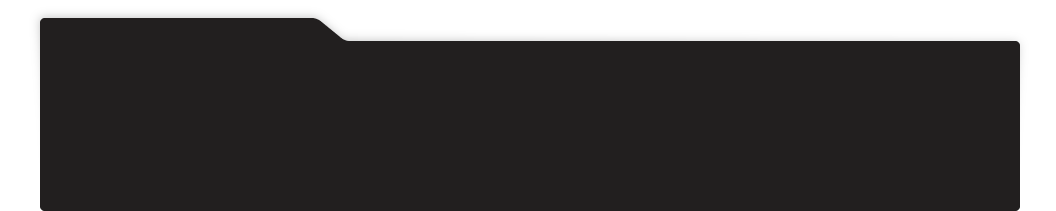
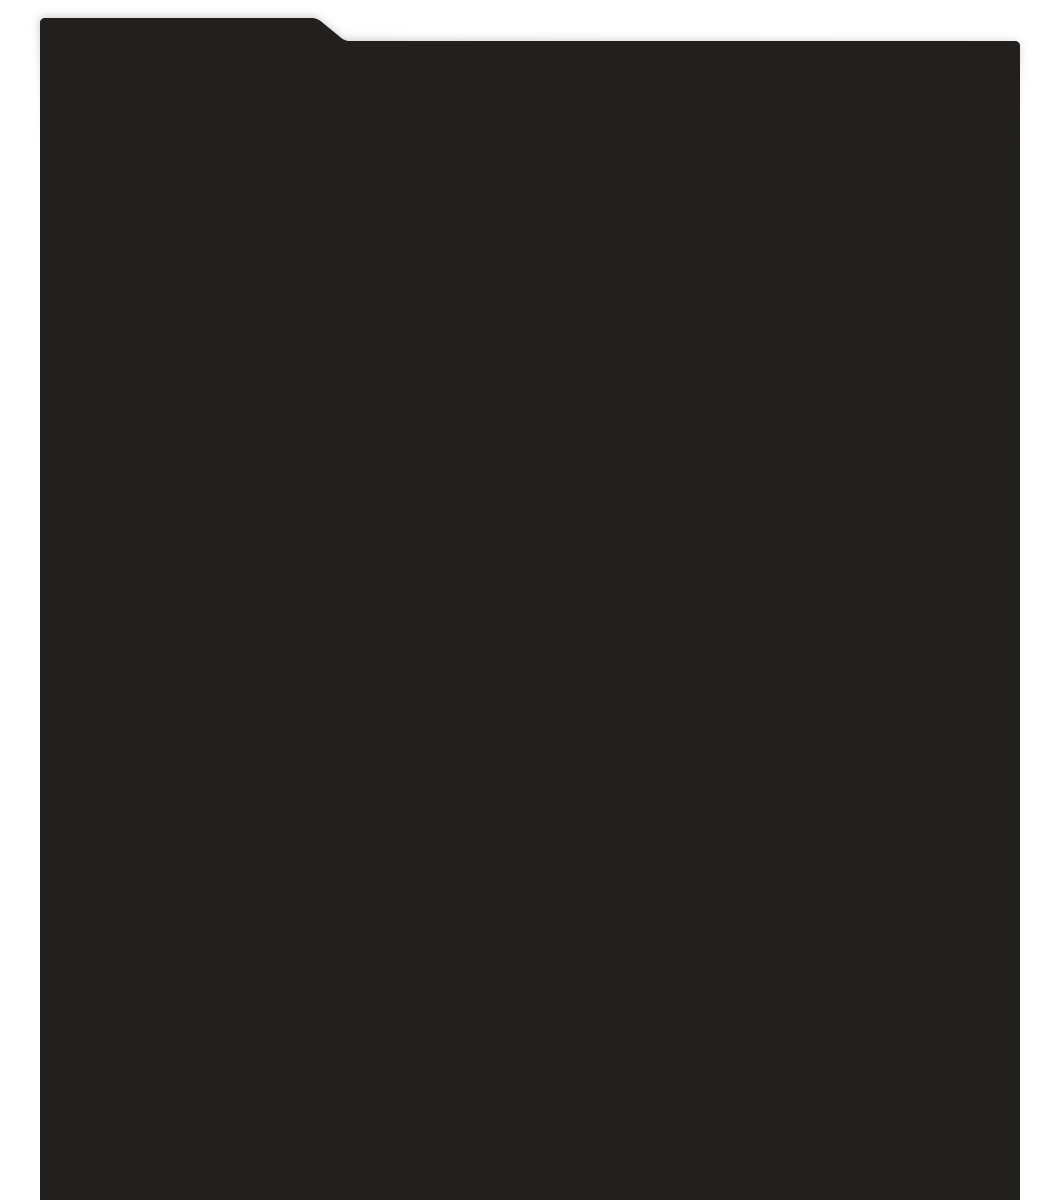
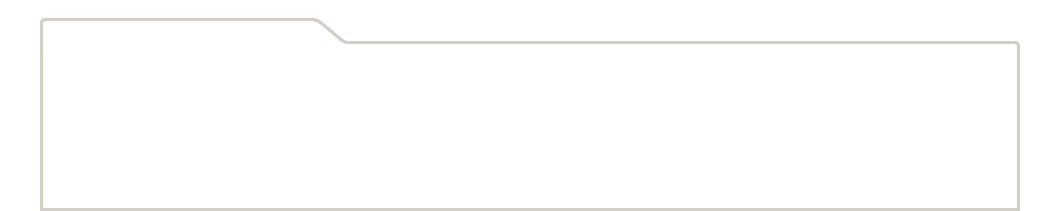
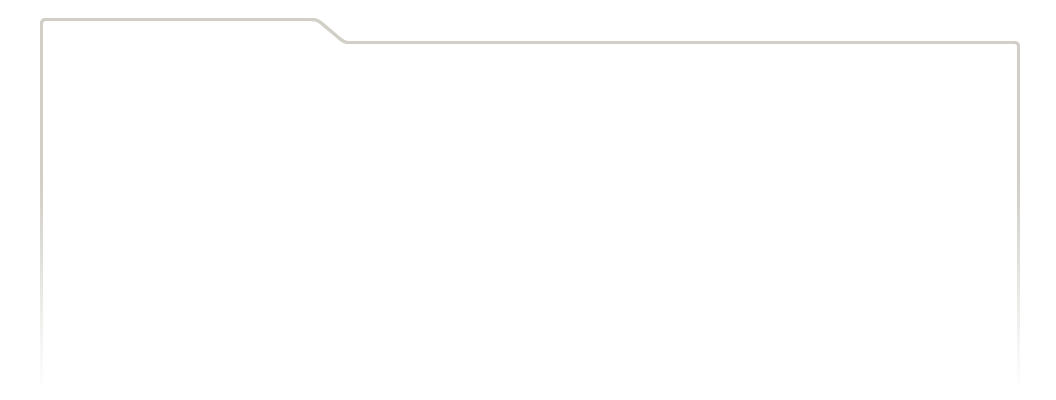
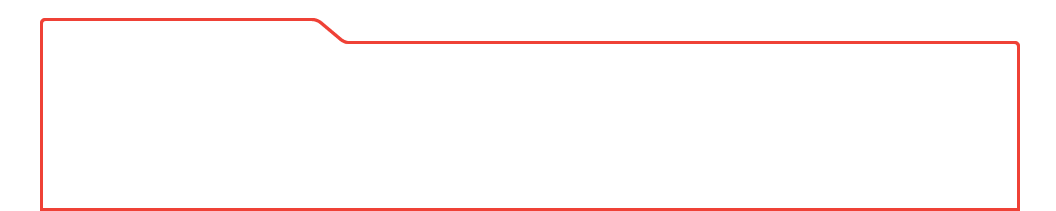
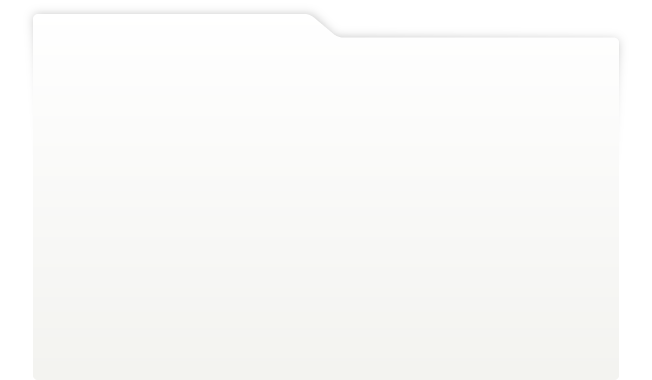
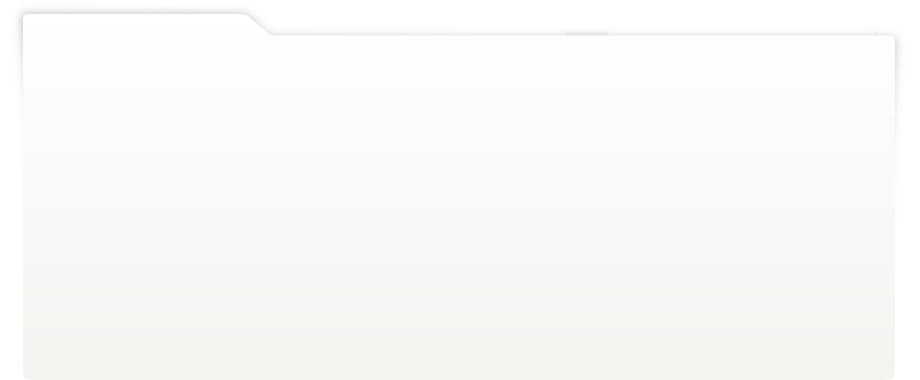
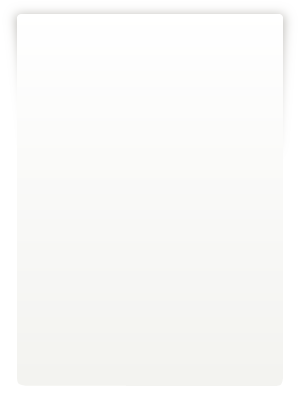
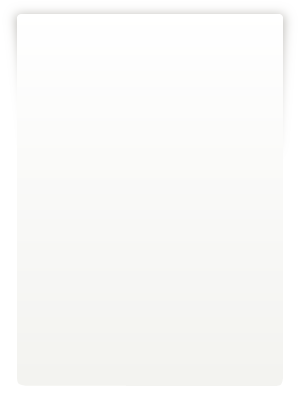
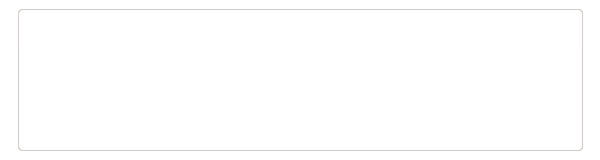
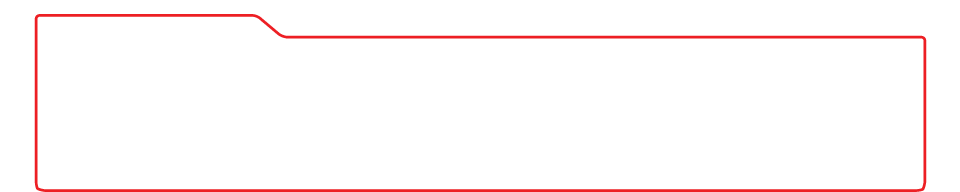
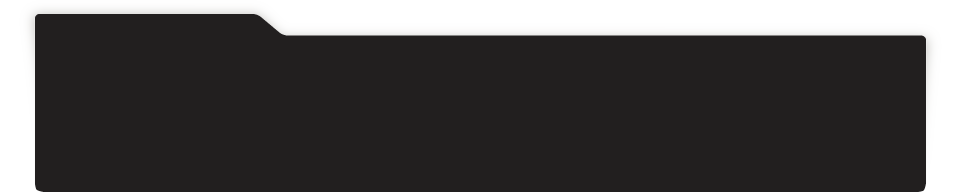
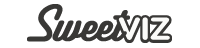
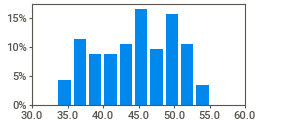
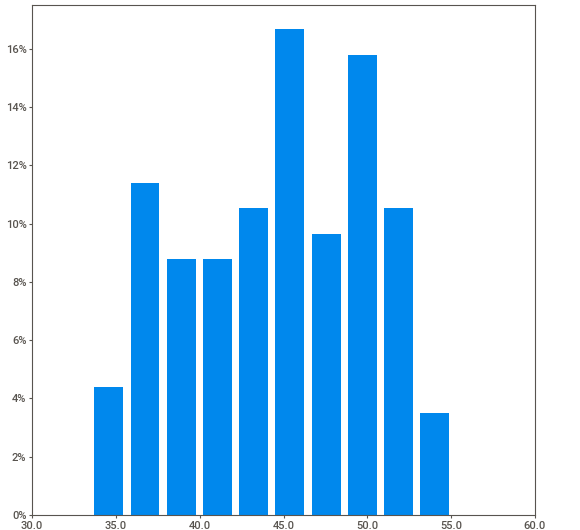
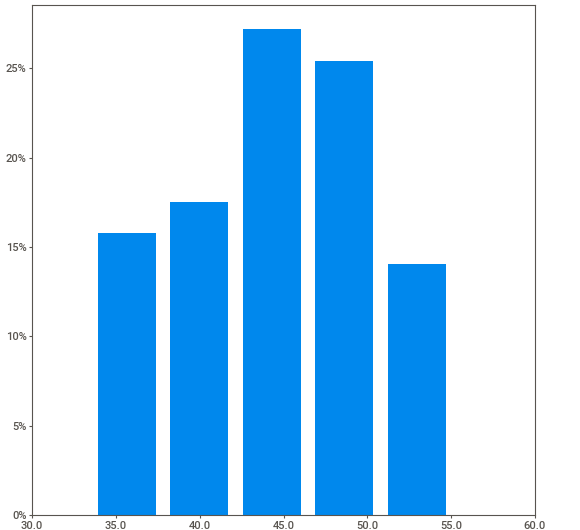
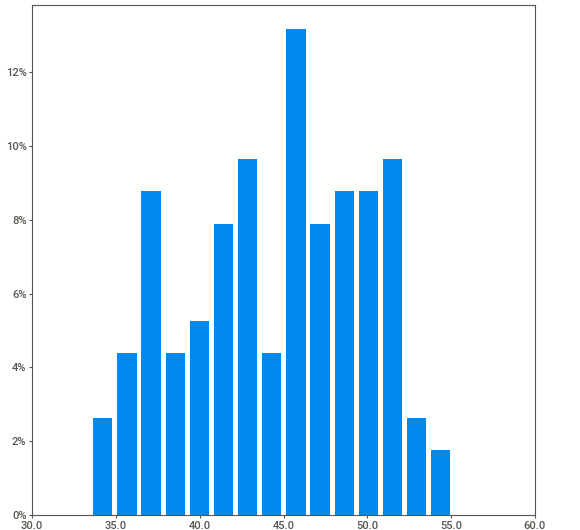
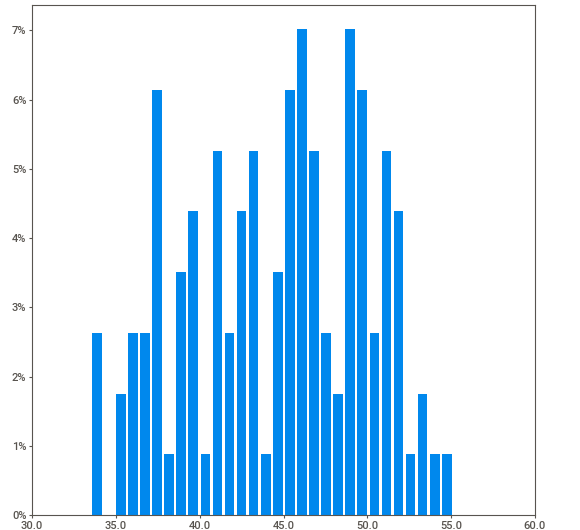
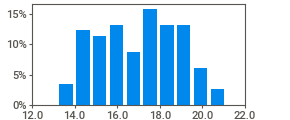
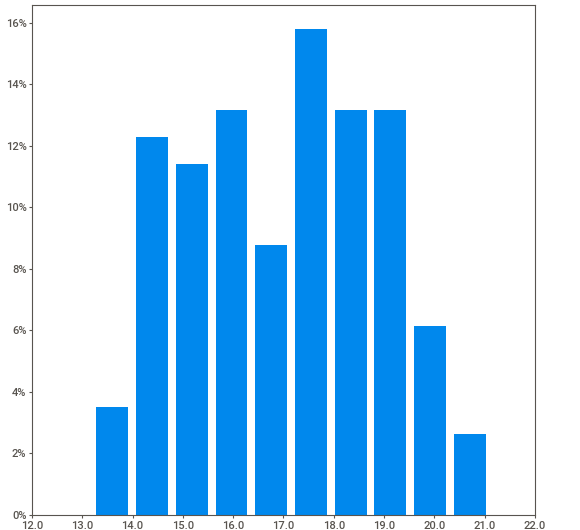
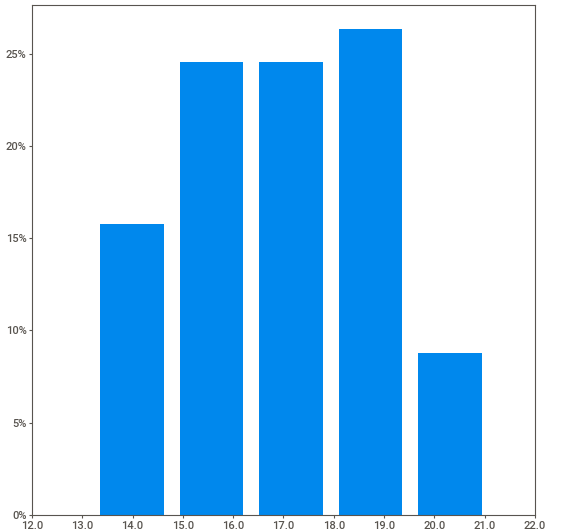
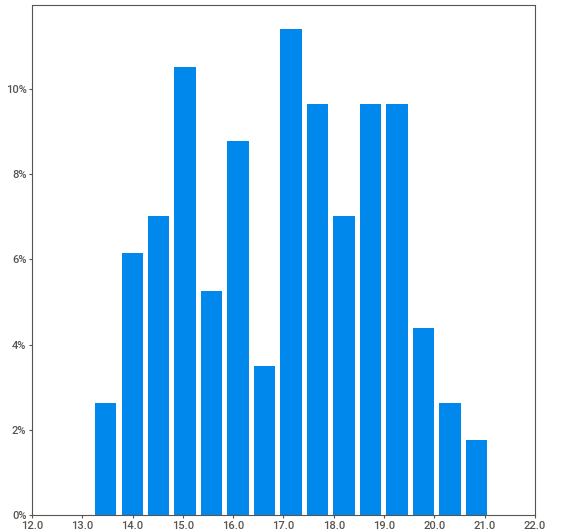
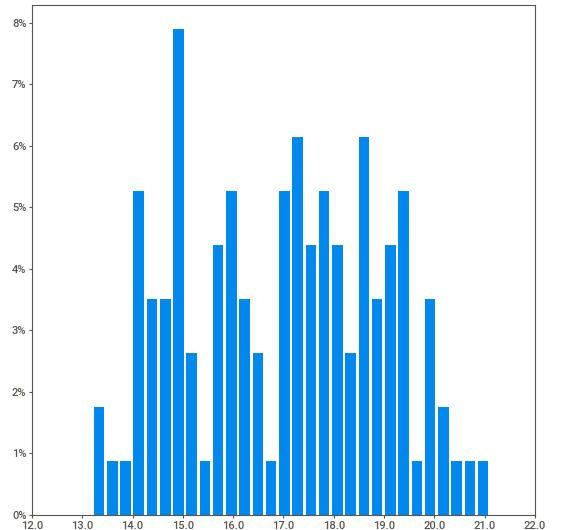
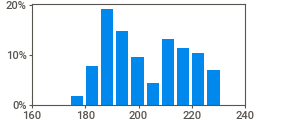
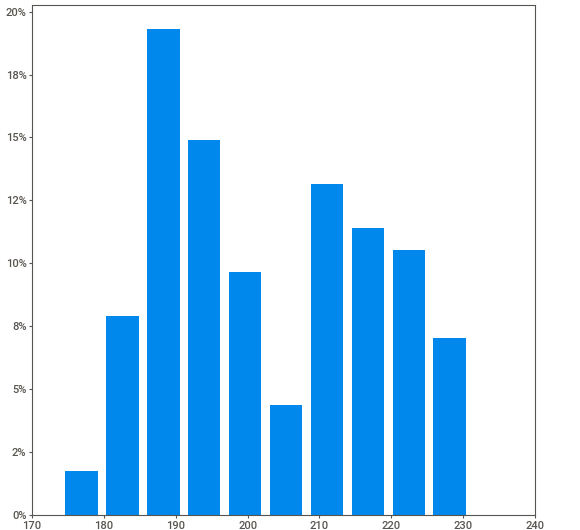
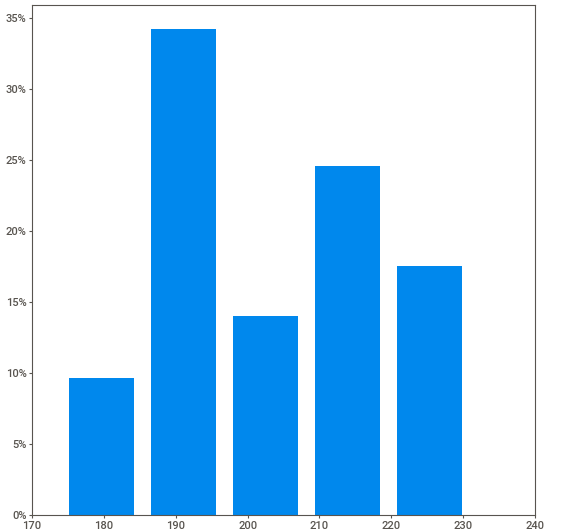
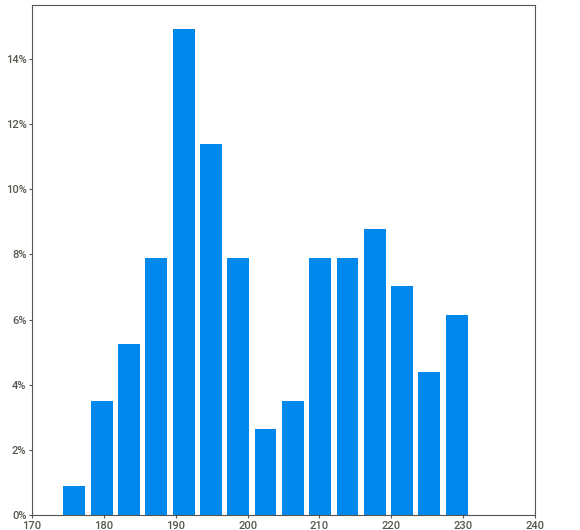
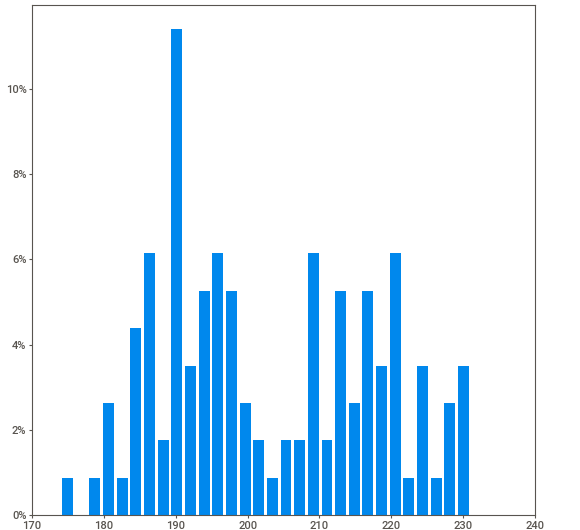
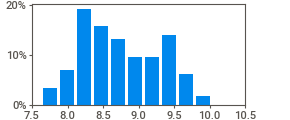
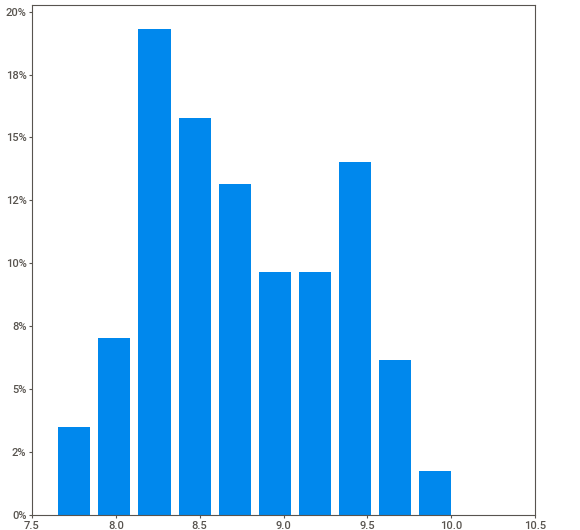
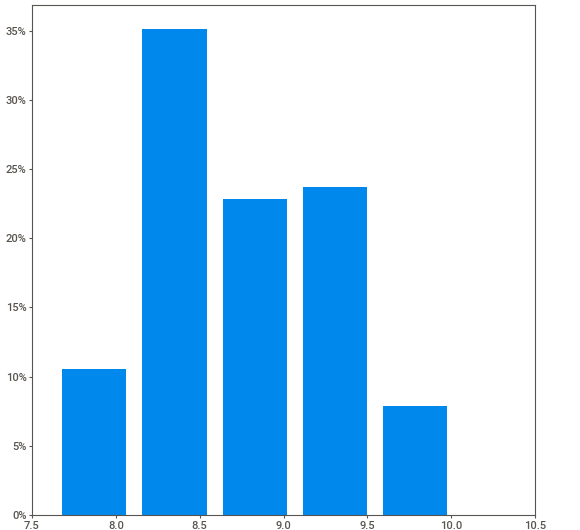
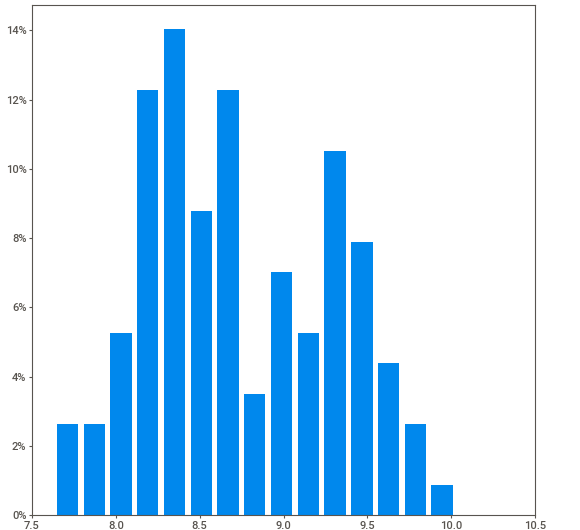
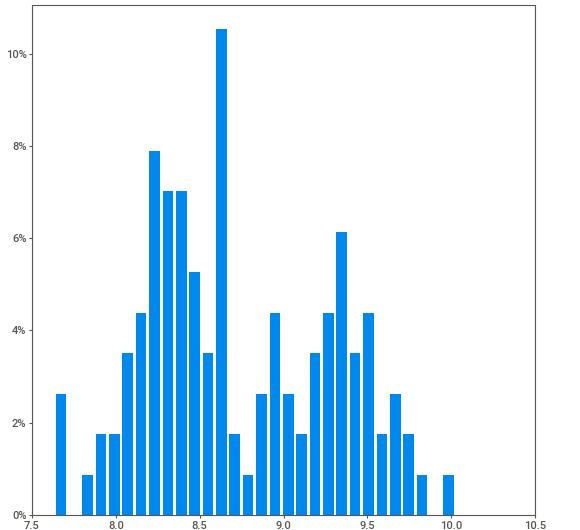
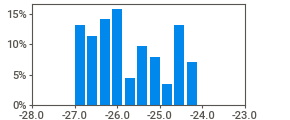
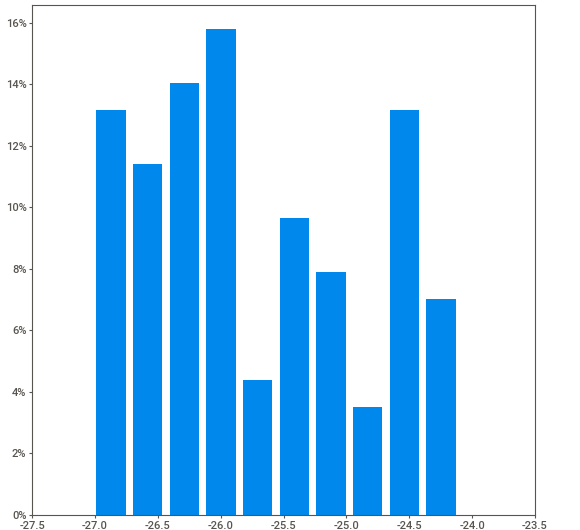
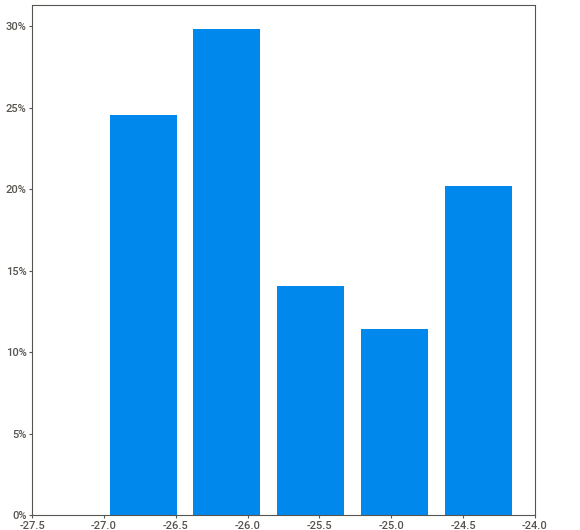
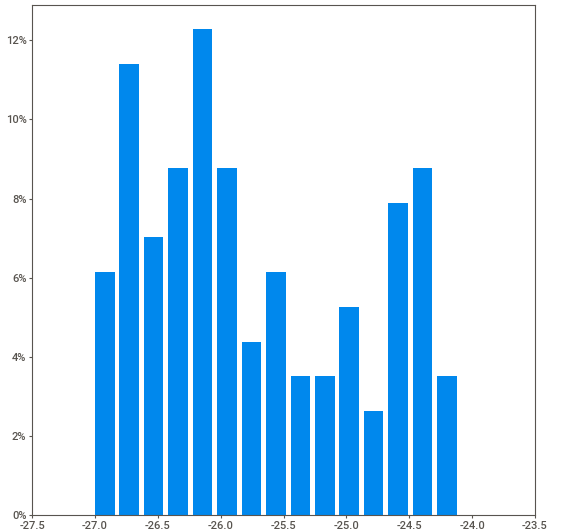
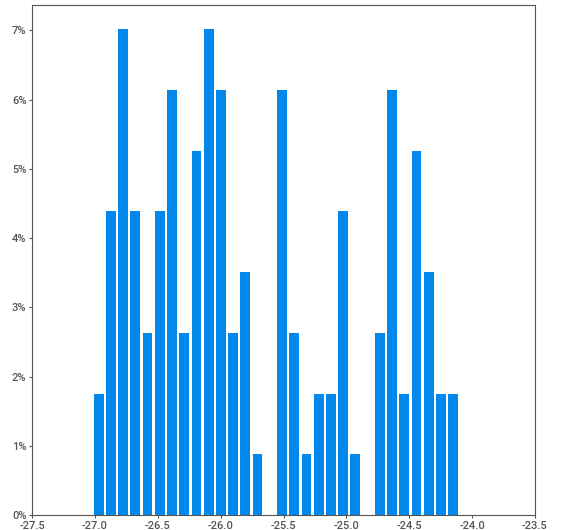
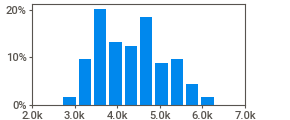
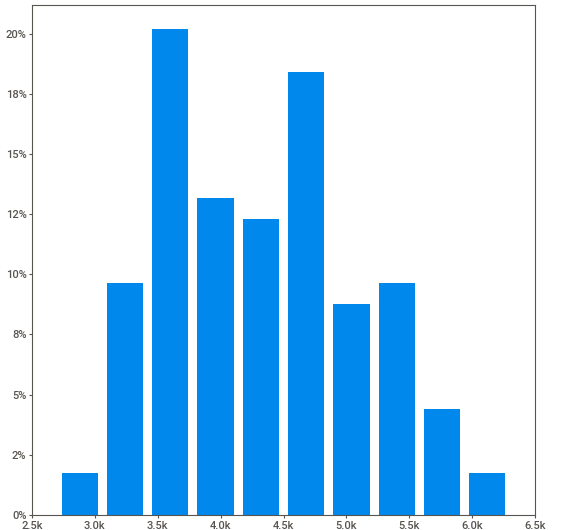
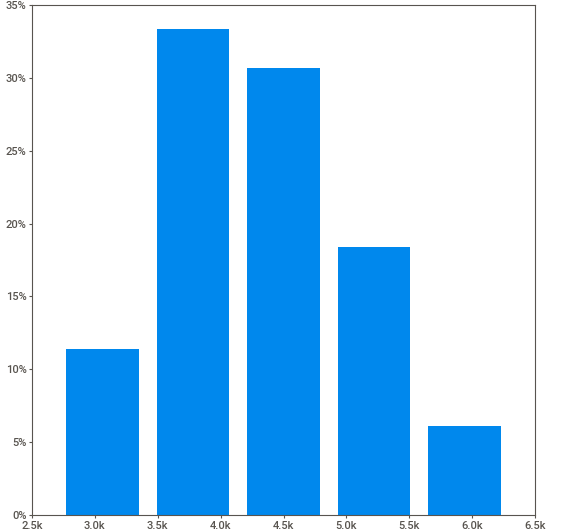
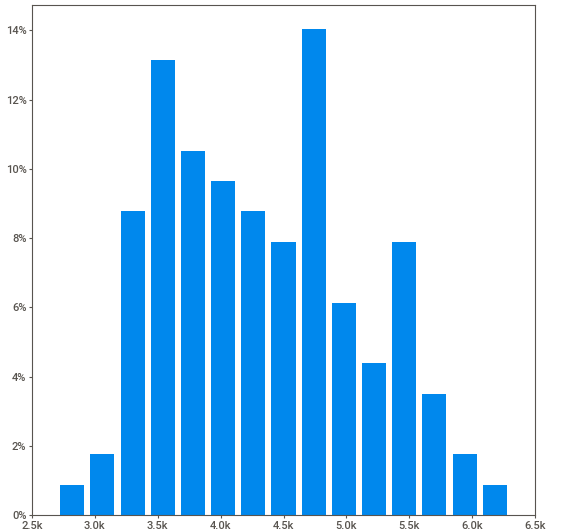
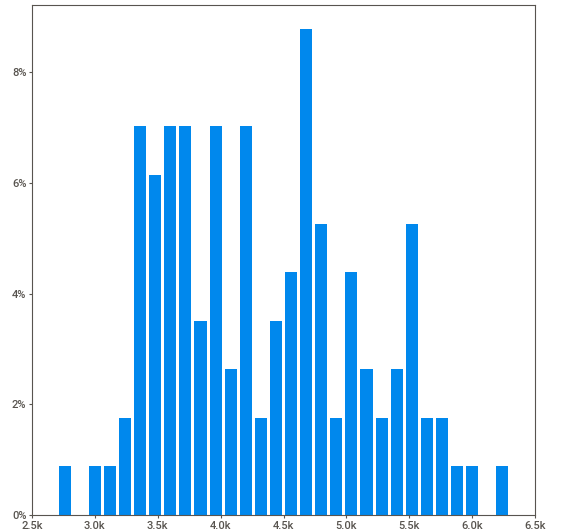
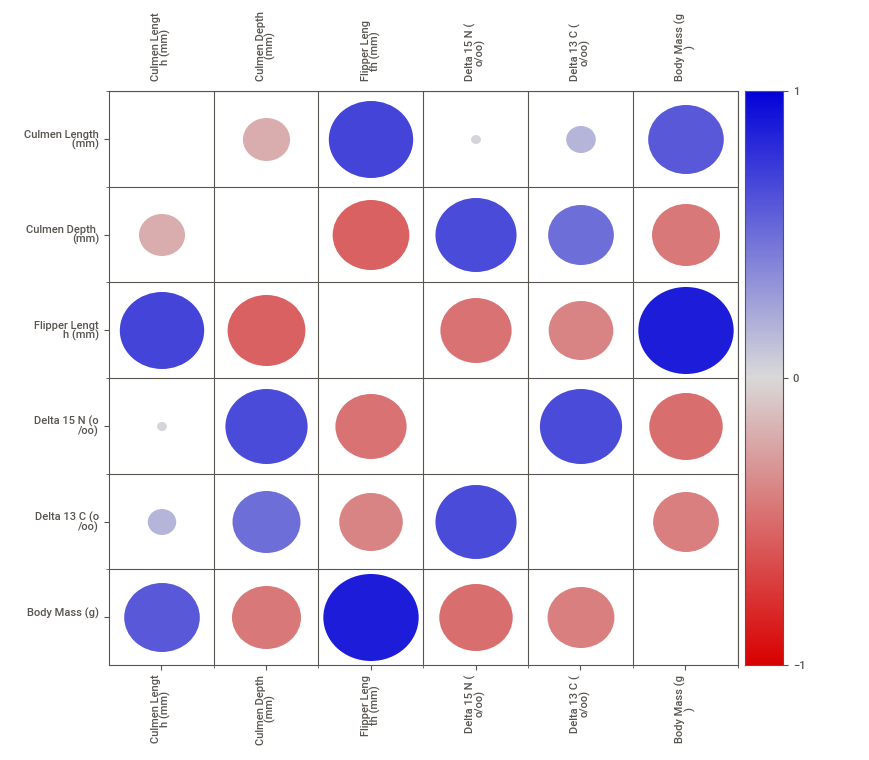
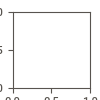

In [49]:
# Numerical Dataset 분석
my_report_numerical = sv.analyze(numerical_columns_df)
my_report_numerical.show_notebook()

In [110]:
#큰 이상치는 없음
sum = 0

for col in numerical_columns_df.astype(float):
    sum_col = 0
    mean = numerical_columns_df[col].mean()
    std = numerical_columns_df[col].std()
    for i in numerical_columns_df[col]:
      if i >= mean+3*std or i <= mean - 3*std:
        sum_col += 1
    print(f"{col} : {sum_col}")
print(sum)

Culmen Length (mm) : 0
Culmen Depth (mm) : 0
Flipper Length (mm) : 0
Delta 15 N (o/oo) : 0
Delta 13 C (o/oo) : 0
Body Mass (g) : 0
0


#***범주형 데이터 라벨 인코딩 하기***

In [111]:
object_columns_df.describe()

,Species,Island,Sex
count,114,114,114
unique,3,3,2
top,Gentoo penguin (Pygoscelis papua),Biscoe,MALE
freq,48,57,59


In [112]:
object_columns_df

,Species,Island,Sex
0,Gentoo penguin (Pygoscelis papua),Biscoe,MALE
1,Chinstrap penguin (Pygoscelis antarctica),Dream,MALE
2,Gentoo penguin (Pygoscelis papua),Biscoe,FEMALE
3,Gentoo penguin (Pygoscelis papua),Biscoe,FEMALE
4,Gentoo penguin (Pygoscelis papua),Biscoe,MALE
...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE
110,Adelie Penguin (Pygoscelis adeliae),Dream,MALE
111,Adelie Penguin (Pygoscelis adeliae),Dream,MALE
112,Chinstrap penguin (Pygoscelis antarctica),Dream,FEMALE


In [113]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(object_columns_df['Species'])
lb.classes_
object_columns_df['Species'] = lb.transform(object_columns_df['Species'])

In [114]:
lb = preprocessing.LabelEncoder()
lb.fit(object_columns_df['Sex'])
lb.classes_
object_columns_df['Sex'] = lb.transform(object_columns_df['Sex'])

In [115]:
lb = preprocessing.LabelEncoder()
lb.fit(object_columns_df['Island'])
lb.classes_
object_columns_df['Island'] = lb.transform(object_columns_df['Island'])

In [116]:
object_columns_df

,Species,Island,Sex
0,2,0,1
1,1,1,1
2,2,0,0
3,2,0,0
4,2,0,1
...,...,...,...
109,0,2,0
110,0,1,1
111,0,1,1
112,1,1,0


#***수치형 데이터 정규화 하기***

In [143]:
numerical_columns_df

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,1.02,-0.89,1.16,-0.77,0.62,1.57
1,0.92,1.03,-0.21,1.58,1.61,-0.68
2,0.09,-1.35,0.48,-0.39,-1.51,0.09
3,-0.02,-1.20,0.75,-0.95,-0.52,0.67
4,0.94,-0.53,1.50,-0.63,-1.31,1.76
...,...,...,...,...,...,...
109,-1.51,0.41,-1.24,-0.19,-0.27,-0.81
110,-1.02,0.82,-0.89,0.66,-0.08,-0.10
111,-0.27,0.77,-0.76,0.41,-0.37,-0.29
112,0.43,-0.21,-0.76,1.89,1.15,-2.09


In [144]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard_fitted = standard.fit_transform(numerical_columns_df.iloc[:,0:6])
numerical_columns_df2 = numerical_columns_df.copy()
numerical_columns_df2 = round(pd.DataFrame(standard_fitted), 2)
numerical_columns_df2.rename(columns = {0 : 'Culmen Length (mm)', 
                     1 : 'Culmen Depth (mm)',
                     2 : 'Flipper Length (mm)',
                     3 : 'Delta 15 N (o/oo)',
                     4 : 'Delta 13 C (o/oo)',
                     5 : 'Body Mass (g)'} , inplace = True)
numerical_columns_df = numerical_columns_df2.copy()


In [146]:
numerical_columns_df

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,1.02,-0.89,1.16,-0.77,0.63,1.57
1,0.92,1.03,-0.21,1.61,1.64,-0.68
2,0.09,-1.35,0.48,-0.39,-1.52,0.09
3,-0.02,-1.20,0.75,-0.96,-0.52,0.67
4,0.94,-0.53,1.50,-0.63,-1.32,1.76
...,...,...,...,...,...,...
109,-1.51,0.41,-1.24,-0.19,-0.27,-0.81
110,-1.02,0.82,-0.89,0.67,-0.07,-0.10
111,-0.27,0.77,-0.76,0.42,-0.37,-0.29
112,0.43,-0.21,-0.76,1.92,1.17,-2.09
